In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import numpy as np
from scipy.stats import boxcox
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split,cross_validate,StratifiedKFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,confusion_matrix,make_scorer
import pickle
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import sklearn

In [1104]:
data=pd.read_csv("F:\\datacode\\loan_data.csv")

In [821]:
data.shape

(1413701, 158)

In [823]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB


In [825]:
for col in data.columns:
    print(col)


SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE_x
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT_x
AMT_ANNUITY_x
AMT_GOODS_PRICE_x
NAME_TYPE_SUITE_x
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START_x
HOUR_APPR_PROCESS_START_x
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVING

In [833]:

# # Set options to display all columns and rows
#pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)   

In [835]:
data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE_x             0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT_x                     0.000000
AMT_ANNUITY_x                    0.006578
AMT_GOODS_PRICE_x                0.085449
NAME_TYPE_SUITE_x                0.249416
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     66.294499
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [1105]:
#dropping columns which are 45% above null values

threshold =len(data)*0.55
data=data.dropna(thresh=threshold,axis=1)

In [839]:
data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE_x             0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT_x                     0.000000
AMT_ANNUITY_x                    0.006578
AMT_GOODS_PRICE_x                0.085449
NAME_TYPE_SUITE_x                0.249416
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [841]:
data.shape

(1413701, 104)

In [843]:
data["TARGET"].value_counts()

TARGET
0    1291341
1     122360
Name: count, dtype: int64

In [845]:
data.duplicated().sum()

0

In [1046]:
data["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
Laborers                 251299
Sales staff              151358
Core staff               118272
Managers                  94941
Drivers                   84067
High skill tech staff     48483
Accountants               41958
Medicine staff            39999
Security staff            31702
Cooking staff             28726
Cleaning staff            24328
Private service staff     12238
Low-skill Laborers         9320
Waiters/barmen staff       6132
Secretaries                5738
Realty agents              3544
HR staff                   2313
IT staff                   1703
Name: count, dtype: int64

In [954]:
# count_list =occupation_list.values.tolist()

In [1050]:
# Filling null with top three occupation typr
data["OCCUPATION_TYPE"].isnull().sum()

457580

In [1106]:
top_occupations = ["Laborers","Sales staff","Core staff"]

In [1107]:
null_index = data[data["OCCUPATION_TYPE"].isnull()].index

In [1108]:
for i, idx in enumerate(null_index):
    data.at[idx, "OCCUPATION_TYPE"] = top_occupations[i % len(top_occupations)]

In [1060]:
data["OCCUPATION_TYPE"].isnull().sum()

0

In [1062]:
data["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
Laborers                 403826
Sales staff              303885
Core staff               270798
Managers                  94941
Drivers                   84067
High skill tech staff     48483
Accountants               41958
Medicine staff            39999
Security staff            31702
Cooking staff             28726
Cleaning staff            24328
Private service staff     12238
Low-skill Laborers         9320
Waiters/barmen staff       6132
Secretaries                5738
Realty agents              3544
HR staff                   2313
IT staff                   1703
Name: count, dtype: int64

In [15]:
#Scatter plot for ext sources

# plt.figure(figsize=(15,5))
# sns.scatterplot(data=data,x="EXT_SOURCE_2",y="EXT_SOURCE_3")
# plt.show()

In [16]:
#data.select_dtypes(include=["int64","float64"]).columns

In [17]:
# data[["AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON"
#            ,"AMT_REQ_CREDIT_BUREAU_QRT"]]

In [18]:
#countplot

# plt.figure(figsize=(15,5))
# sns.countplot(data=amt,x="AMT_INCOME_TOTAL",y="AMT_CREDIT_x	A")


<Axes: xlabel='count', ylabel='OCCUPATION_TYPE'>

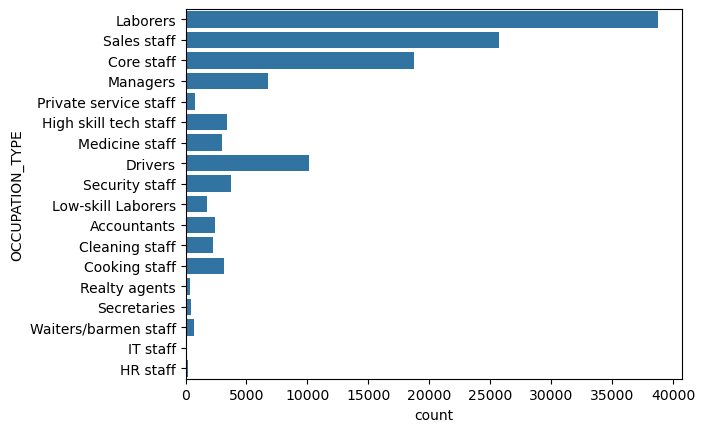

In [1064]:
#count plot which client as payment difficulties
sns.countplot(data[data["TARGET"]==1]["OCCUPATION_TYPE"])

In [20]:
#sparsity

# sp=[]
# for i in data.columns:
#   zero=(data[i]==0).sum()
#   sp.append(zero)

In [21]:
# pd.DataFrame({
#     "columns":data.columns,
#     "sparsity":sp
# })

In [1109]:
#Seperating numerical and categorical columns
numerical_col=data.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_col=data.select_dtypes(include=["object"]).columns.tolist()

In [1110]:
data[numerical_col].isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT_x                    0.000000
AMT_ANNUITY_x                   0.006578
AMT_GOODS_PRICE_x               0.085449
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
CNT_FAM_MEMBERS                 0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
HOUR_APPR_PROCESS_START_x       0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_

In [24]:
data["EXT_SOURCE_3"].mean()

0.4896986356017283

In [25]:
data["EXT_SOURCE_3"].median()

0.5100895276257282

In [26]:
data["DAYS_LAST_DUE"].median()

-534.0

In [27]:
# AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT

In [28]:
data["AMT_REQ_CREDIT_BUREAU_QRT"].median()

0.0

In [29]:
data["AMT_REQ_CREDIT_BUREAU_MON"].median()

0.0

In [30]:
data["AMT_REQ_CREDIT_BUREAU_YEAR"].median()

3.0

In [1111]:
# Median imputation for numerical columns
for col in numerical_col:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_8696\2069105703.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [1074]:
data[categorical_col].isnull().mean()*100

NAME_CONTRACT_TYPE_x            0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
NAME_TYPE_SUITE_x               0.249416
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
OCCUPATION_TYPE                 0.000000
WEEKDAY_APPR_PROCESS_START_x    0.000000
ORGANIZATION_TYPE               0.000000
NAME_CONTRACT_TYPE_y            0.000000
WEEKDAY_APPR_PROCESS_START_y    0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
NAME_SELLER_INDU

In [1113]:
# Dropping nan which are less than 1% 
data.dropna(axis=1,inplace=True)

In [1078]:
data.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                   0
AMT_GOODS_PRICE_x               0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_

In [1117]:
data.drop(["SK_ID_CURR","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE",               
"REGION_POPULATION_RELATIVE","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_MOBIL",
"FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","REGION_RATING_CLIENT",            
"REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START_x","HOUR_APPR_PROCESS_START_x",       
"REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION",     
"REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","ORGANIZATION_TYPE","OBS_30_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE",
"FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6",                
"FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12",              
"FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18",               
"FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR","SK_ID_PREV","NAME_CONTRACT_TYPE_y",
"AMT_ANNUITY_y","AMT_APPLICATION","AMT_GOODS_PRICE_y","WEEKDAY_APPR_PROCESS_START_y","HOUR_APPR_PROCESS_START_y",
"FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY","NAME_CONTRACT_STATUS","DAYS_DECISION","NAME_PAYMENT_TYPE",
"CODE_REJECT_REASON","NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE",
"SELLERPLACE_AREA","NAME_SELLER_INDUSTRY","CNT_PAYMENT","NAME_YIELD_GROUP","DAYS_FIRST_DRAWING",
"DAYS_LAST_DUE_1ST_VERSION","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"],axis=1,inplace=True)

In [1082]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   TARGET                     1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE_x       1413701 non-null  object 
 2   CODE_GENDER                1413701 non-null  object 
 3   FLAG_OWN_CAR               1413701 non-null  object 
 4   FLAG_OWN_REALTY            1413701 non-null  object 
 5   CNT_CHILDREN               1413701 non-null  int64  
 6   AMT_INCOME_TOTAL           1413701 non-null  float64
 7   AMT_CREDIT_x               1413701 non-null  float64
 8   AMT_ANNUITY_x              1413701 non-null  float64
 9   AMT_GOODS_PRICE_x          1413701 non-null  float64
 10  NAME_INCOME_TYPE           1413701 non-null  object 
 11  DAYS_BIRTH                 1413701 non-null  int64  
 12  DAYS_EMPLOYED              1413701 non-null  int64  
 13  FLAG_EMP_PHO

In [1084]:
data.shape

(1413701, 25)

In [1118]:
data.duplicated().sum()

135794

In [1119]:
data.drop_duplicates(inplace=True)

In [1122]:
data.duplicated().sum()

0

In [1092]:
data.shape

(1277907, 25)

In [ ]:
# FEATURE ENGINEERING

In [1130]:
#converting days into age
data["AGE"] = abs(data["DAYS_BIRTH"])//365.25 #approx for leap year


In [1132]:
data.drop("DAYS_BIRTH",axis=1,inplace=True)

In [1142]:
# Seperating them based on age group

def age_group(age):
    if age >=20 and age <= 35:
        return "Adult"
    elif age >=36 and age <= 60:
        return "Middle-age"
    else:
        return "Senior"
data["AGE_GROUP"] = data["AGE"].apply(age_group)    

In [1148]:
data["DAYS_FIRST_DUE"].value_counts()

DAYS_FIRST_DUE
-825.0       425794
 365243.0     33952
-334.0          661
-299.0          653
-208.0          650
-292.0          647
-509.0          643
-691.0          643
-327.0          636
-488.0          633
-330.0          633
-298.0          632
-270.0          630
-328.0          629
-329.0          628
-361.0          626
-264.0          625
-698.0          624
-320.0          621
-418.0          621
-326.0          621
-313.0          617
-508.0          616
-240.0          612
-325.0          607
-333.0          607
-324.0          604
-453.0          604
-242.0          601
-445.0          601
-271.0          601
-600.0          600
-516.0          600
-265.0          599
-262.0          599
-209.0          599
-335.0          598
-331.0          598
-384.0          597
-340.0          596
-321.0          595
-257.0          594
-390.0          593
-425.0          592
-417.0          592
-322.0          592
-481.0          591
-269.0          590
-266.0          589
-432.

In [1150]:
# Replacing out of range values with NaN and filling them with median
data["DAYS_FIRST_DUE"] = data["DAYS_FIRST_DUE"].apply(lambda x : x if -3650<= x <= 1000 else np.nan)
data["DAYS_FIRST_DUE"].fillna(data["DAYS_FIRST_DUE"].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_8696\3644197221.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["DAYS_FIRST_DUE"].fillna(data["DAYS_FIRST_DUE"].median(),inplace=True)


In [1154]:
data["DAYS_LAST_DUE"].value_counts()

DAYS_LAST_DUE
-534.0       425755
 365243.0    180776
-239.0          569
-188.0          564
-245.0          559
-236.0          550
-167.0          547
-160.0          545
-247.0          544
-223.0          542
-268.0          538
-243.0          536
-153.0          536
-241.0          535
-305.0          533
-175.0          531
-92.0           531
-240.0          531
-202.0          531
-231.0          530
-164.0          530
-134.0          529
-251.0          527
-133.0          527
-233.0          527
-242.0          526
-203.0          526
-211.0          526
-185.0          526
-271.0          525
-333.0          524
-308.0          524
-234.0          523
-181.0          523
-111.0          523
-248.0          523
-222.0          522
-115.0          522
-232.0          522
-170.0          520
-250.0          520
-275.0          520
-192.0          519
-76.0           519
-174.0          519
-204.0          519
-217.0          518
-207.0          518
-276.0          518
-212.0

In [1156]:
# Replacing out of range values with NaN and filling them with median
data["DAYS_LAST_DUE"] = data["DAYS_LAST_DUE"].apply(lambda x : x if -3650<= x <= 1000 else np.nan)
data["DAYS_LAST_DUE"].fillna(data["DAYS_LAST_DUE"].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_8696\2724927549.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["DAYS_LAST_DUE"].fillna(data["DAYS_LAST_DUE"].median(),inplace=True)


In [1160]:
data["DAYS_EMPLOYED"].value_counts()

DAYS_EMPLOYED
 365243    255128
-196          559
-199          518
-224          514
-188          512
-384          510
-200          507
-229          504
-230          497
-237          495
-231          491
-370          487
-348          482
-425          480
-212          480
-1646         476
-620          472
-241          470
-213          466
-233          465
-214          464
-745          461
-401          459
-978          458
-207          454
-195          453
-1108         452
-992          451
-382          451
-261          451
-926          450
-202          448
-381          446
-716          446
-210          444
-780          441
-464          440
-808          438
-215          438
-218          436
-234          435
-572          435
-112          435
-221          434
-228          433
-193          433
-141          433
-240          432
-801          431
-395          430
-1598         430
-1114         429
-216          429
-1049         429
-181          

In [1162]:
# Replacing unrealistic value with nan and filling them with median
data["DAYS_EMPLOYED"] = data["DAYS_EMPLOYED"].apply(lambda x: x if -3650 <= x <= 1000 else np.nan)
data["DAYS_EMPLOYED"].fillna(data["DAYS_EMPLOYED"].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_8696\2258725868.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["DAYS_EMPLOYED"].fillna(data["DAYS_EMPLOYED"].median(),inplace=True)


In [1164]:
data["CODE_GENDER"].value_counts()

CODE_GENDER
F      864048
M      413810
XNA        49
Name: count, dtype: int64

In [1174]:
data.query('CODE_GENDER!= "XNA"', inplace=True)

In [1176]:
data["CODE_GENDER"].value_counts()

CODE_GENDER
F    864048
M    413810
Name: count, dtype: int64

In [1178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1277858 entries, 0 to 1413700
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   TARGET                     1277858 non-null  int64  
 1   NAME_CONTRACT_TYPE_x       1277858 non-null  object 
 2   CODE_GENDER                1277858 non-null  object 
 3   FLAG_OWN_CAR               1277858 non-null  object 
 4   FLAG_OWN_REALTY            1277858 non-null  object 
 5   CNT_CHILDREN               1277858 non-null  int64  
 6   AMT_INCOME_TOTAL           1277858 non-null  float64
 7   AMT_CREDIT_x               1277858 non-null  float64
 8   AMT_ANNUITY_x              1277858 non-null  float64
 9   AMT_GOODS_PRICE_x          1277858 non-null  float64
 10  NAME_INCOME_TYPE           1277858 non-null  object 
 11  DAYS_EMPLOYED              1277858 non-null  float64
 12  FLAG_EMP_PHONE             1277858 non-null  int64  
 13  FLAG_EMAIL       

In [1184]:
data["AMT_INCOME_TOTAL"].describe()


count    1.277858e+06
mean     1.722069e+05
std      2.065122e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [1188]:
# Using round for numeric display without scientific notation
data["AMT_INCOME_TOTAL"] = data["AMT_INCOME_TOTAL"].round(0)

In [1202]:
#saving the cleaned file
output_path ="data_cleaned.csv"
data.to_csv(output_path, index=False)

# DATA VISUALIZATION

In [3]:
input_path ="data_cleaned.csv"
data=pd.read_csv(input_path)

In [1206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277858 entries, 0 to 1277857
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   TARGET                     1277858 non-null  int64  
 1   NAME_CONTRACT_TYPE_x       1277858 non-null  object 
 2   CODE_GENDER                1277858 non-null  object 
 3   FLAG_OWN_CAR               1277858 non-null  object 
 4   FLAG_OWN_REALTY            1277858 non-null  object 
 5   CNT_CHILDREN               1277858 non-null  int64  
 6   AMT_INCOME_TOTAL           1277858 non-null  float64
 7   AMT_CREDIT_x               1277858 non-null  float64
 8   AMT_ANNUITY_x              1277858 non-null  float64
 9   AMT_GOODS_PRICE_x          1277858 non-null  float64
 10  NAME_INCOME_TYPE           1277858 non-null  object 
 11  DAYS_EMPLOYED              1277858 non-null  float64
 12  FLAG_EMP_PHONE             1277858 non-null  int64  
 13  FLAG_EMAIL  

In [46]:
# #plot for gender distribution
# gender_count = data["CODE_GENDER"].value_counts().reset_index()
# gender_count.columns =["CODE_GENDER","count"]
# colors=["#ffe5ff","#00c89b"]
# fig= px.bar(gender_count,x="CODE_GENDER",y="count",title="Gender Count",
#            color="CODE_GENDER",color_discrete_sequence=color)
# fig.show()

In [47]:
# def plot(col):
#     df= data[col].value_counts().reset_index()
#     df.columns=[col,"count"]
#     colors=["#ffe5ff","#00c89b"]
#     fig=px.bar(df,x=col,y="count",title=f"Distribution of {col}",
#                color=col,color_discrete_sequence=colors
#               )
#     fig.show()

In [1208]:
# Barplot for categorical features
def plot(col):
    plt.figure(figsize=(8,5))
    plt.xticks(rotation=90)
    df= data[col].value_counts().reset_index()
    print(df.head)
    df.columns=[col,"count"]
    sns.color_palette(palette='PiYG')
    sns.barplot(df,x=col,y="count",palette='PiYG')
    plt.title(f"Distribution of {col}")
    plt.show()

In [1210]:
cat_col= data.select_dtypes(include="object").columns

<bound method NDFrame.head of   NAME_CONTRACT_TYPE_x    count
0           Cash loans  1180161
1      Revolving loans    97697>


C:\Users\admin\AppData\Local\Temp\ipykernel_8696\1764211247.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x=col,y="count",palette='PiYG')


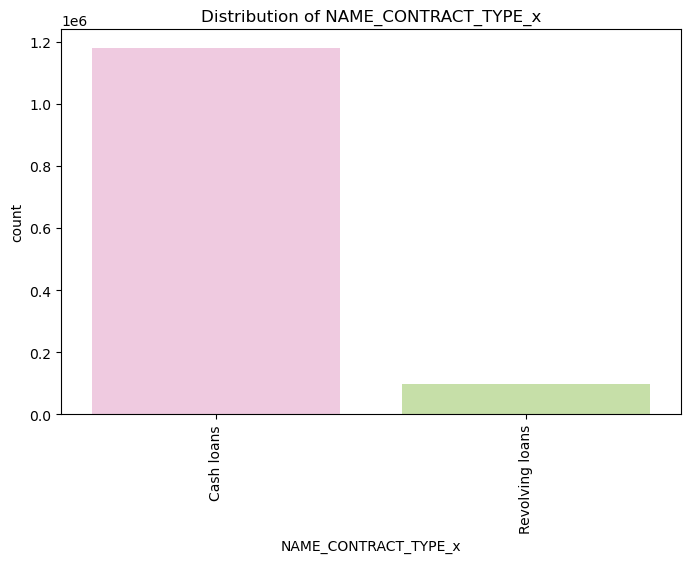

<bound method NDFrame.head of   CODE_GENDER   count
0           F  864048
1           M  413810>


C:\Users\admin\AppData\Local\Temp\ipykernel_8696\1764211247.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x=col,y="count",palette='PiYG')


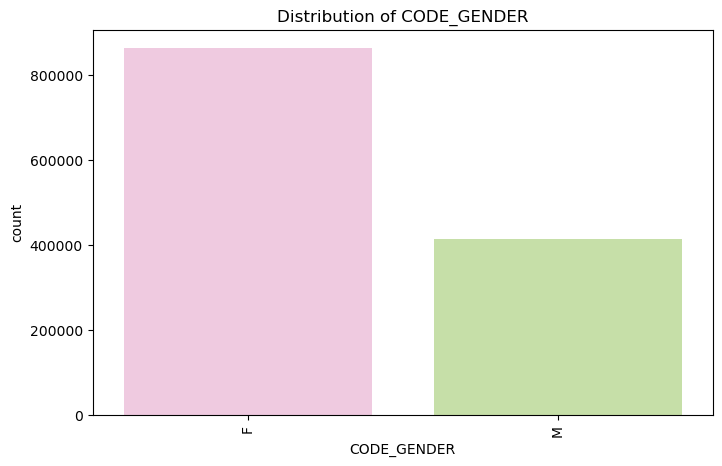

<bound method NDFrame.head of   FLAG_OWN_CAR   count
0            N  845682
1            Y  432176>


C:\Users\admin\AppData\Local\Temp\ipykernel_8696\1764211247.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x=col,y="count",palette='PiYG')


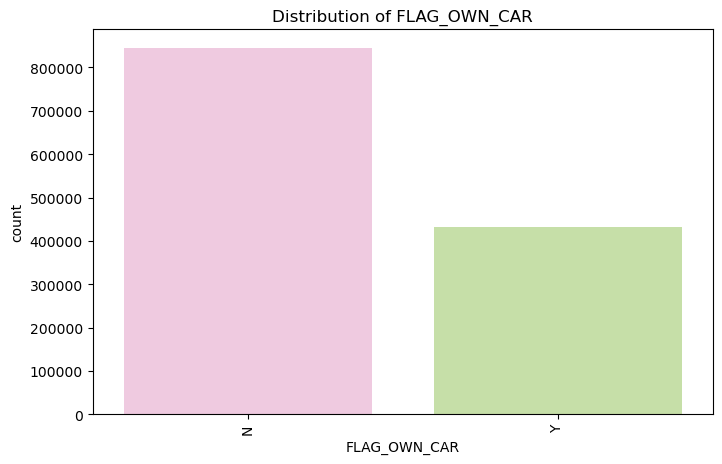

<bound method NDFrame.head of   FLAG_OWN_REALTY   count
0               Y  922078
1               N  355780>


C:\Users\admin\AppData\Local\Temp\ipykernel_8696\1764211247.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x=col,y="count",palette='PiYG')


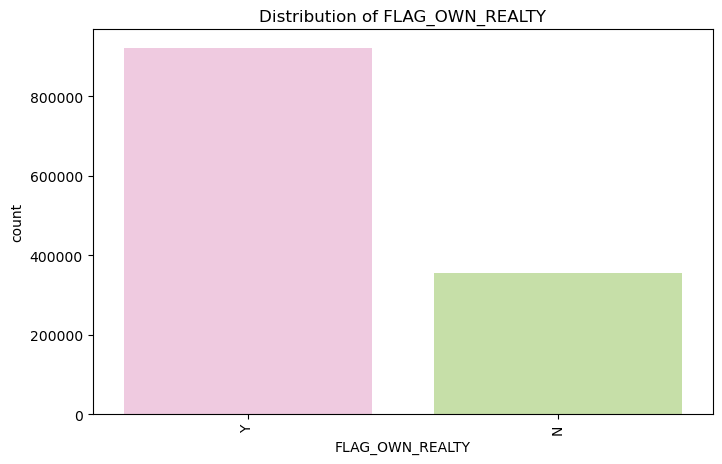

<bound method NDFrame.head of        NAME_INCOME_TYPE   count
0               Working  650239
1  Commercial associate  286773
2             Pensioner  255086
3         State servant   85603
4            Unemployed     119
5               Student      23
6       Maternity leave      15>


C:\Users\admin\AppData\Local\Temp\ipykernel_8696\1764211247.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x=col,y="count",palette='PiYG')


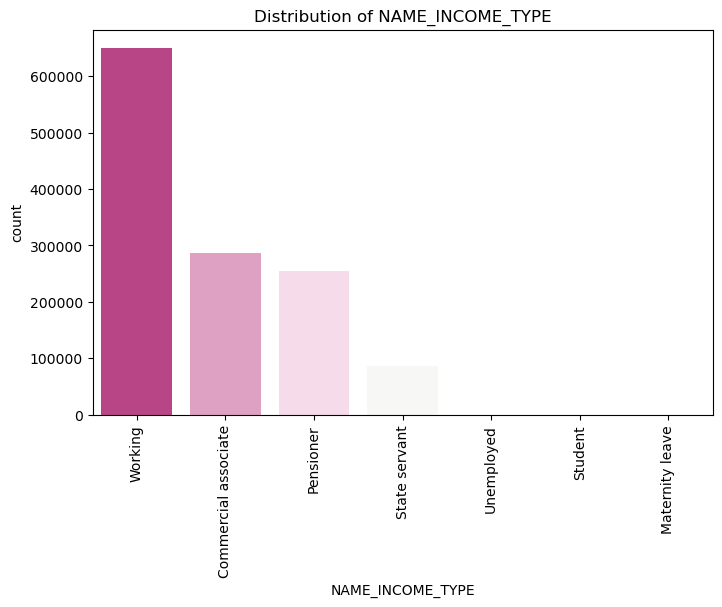

<bound method NDFrame.head of           OCCUPATION_TYPE   count
0                Laborers  367058
1             Sales staff  276302
2              Core staff  248733
3                Managers   83962
4                 Drivers   74671
5   High skill tech staff   43364
6             Accountants   37308
7          Medicine staff   35537
8          Security staff   28023
9           Cooking staff   25489
10         Cleaning staff   21204
11  Private service staff   10721
12     Low-skill Laborers    8237
13   Waiters/barmen staff    5445
14            Secretaries    5099
15          Realty agents    3100
16               HR staff    2029
17               IT staff    1576>


C:\Users\admin\AppData\Local\Temp\ipykernel_8696\1764211247.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x=col,y="count",palette='PiYG')


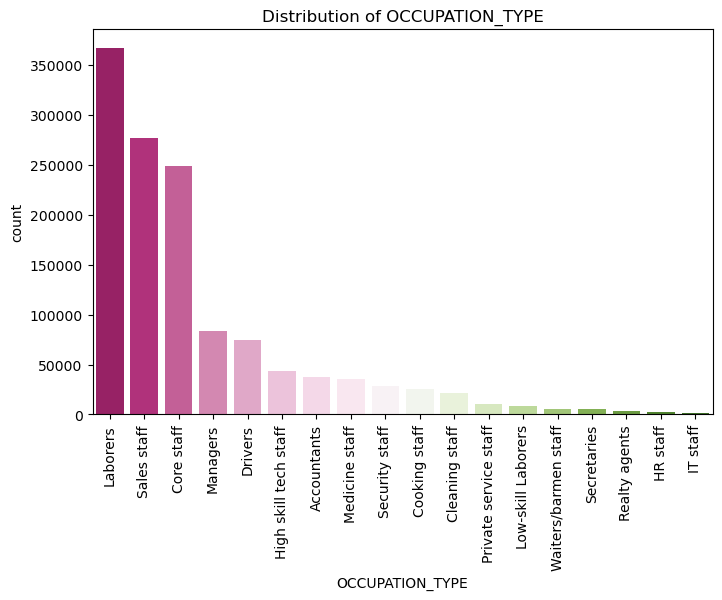

<bound method NDFrame.head of               NAME_CASH_LOAN_PURPOSE   count
0                                XAP  767766
1                                XNA  452296
2                            Repairs   19480
3                              Other   13120
4                       Urgent needs    7062
5                  Buying a used car    2373
6       Building a house or an annex    2264
7                  Everyday expenses    2021
8                           Medicine    1843
9            Payments on other loans    1530
10                         Education    1306
11                           Journey    1021
12  Purchase of electronic equipment     919
13                  Buying a new car     837
14          Wedding / gift / holiday     787
15                       Car repairs     682
16                     Buying a home     674
17                         Furniture     642
18      Buying a holiday home / land     449
19              Business development     349
20       Gasification / w

C:\Users\admin\AppData\Local\Temp\ipykernel_8696\1764211247.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x=col,y="count",palette='PiYG')


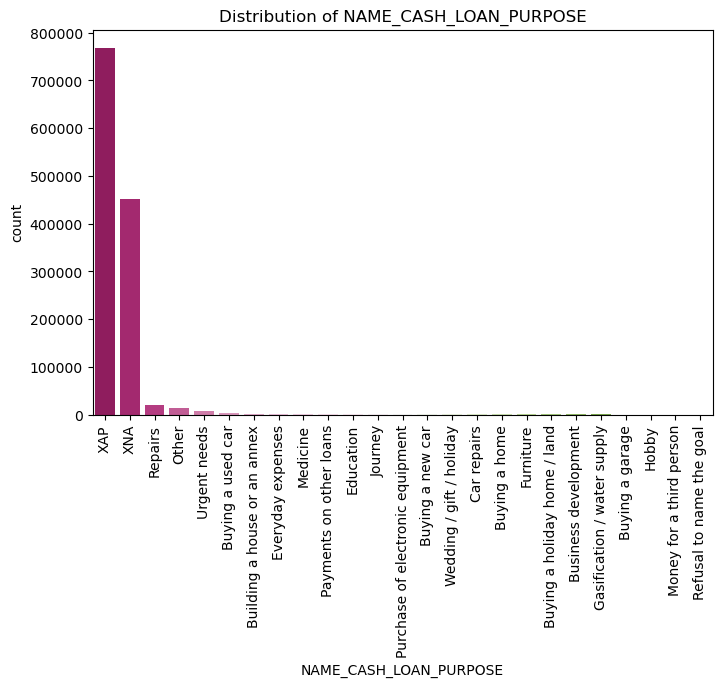

<bound method NDFrame.head of     AGE_GROUP   count
0  Middle-age  782156
1       Adult  355548
2      Senior  140154>


C:\Users\admin\AppData\Local\Temp\ipykernel_8696\1764211247.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x=col,y="count",palette='PiYG')


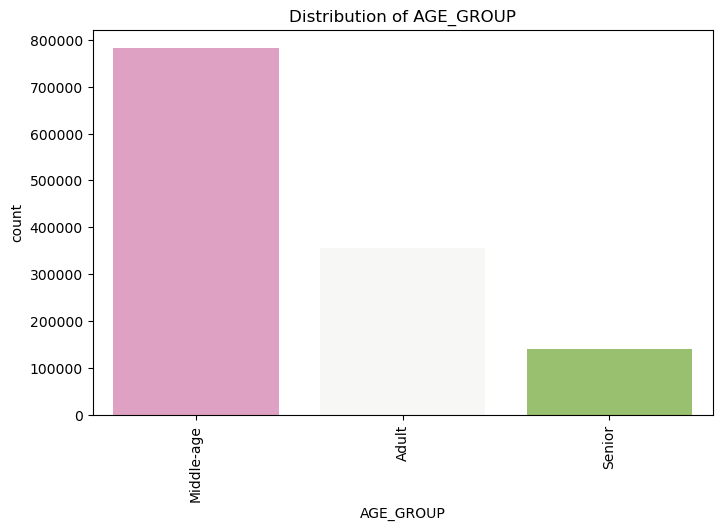

In [1212]:
for i in cat_col:
    plot(i)

In [197]:
#line for ext source

# plt.figure(figsize=(8,5))
# #sns.lineplot(data=data.head(5000),x="EXT_SOURCE_2",y="EXT_SOURCE_3")
# sns.lineplot(data=data.head(50000),x=data.head(50000).index,y="EXT_SOURCE_2")
# sns.lineplot(data=data.head(50000),x=data.head(50000).index,y="EXT_SOURCE_3")
# plt.show()

In [269]:
# data['AMT_INCOME_TOTAL_BINS'] = pd.cut(data['AMT_INCOME_TOTAL'], bins=[0, 100000, 200000, 300000, 400000, 500000])
# sns.countplot(x='AMT_INCOME_TOTAL_BINS', hue='CODE_GENDER', data=data)
# plt.show()


In [271]:
#data[["CODE_GENDER","AMT_INCOME_TOTAL"]].groupby("CODE_GENDER")["AMT_INCOME_TOTAL"].value_counts().reset_index()

In [1214]:
df_1=data[["CODE_GENDER","AMT_INCOME_TOTAL","TARGET"]].groupby("CODE_GENDER")["TARGET"].value_counts().reset_index()

In [1216]:
df_1

CODE_GENDER  TARGET   count
0           F       0  800222
1           F       1   63826
2           M       0  370248
3           M       1   43562

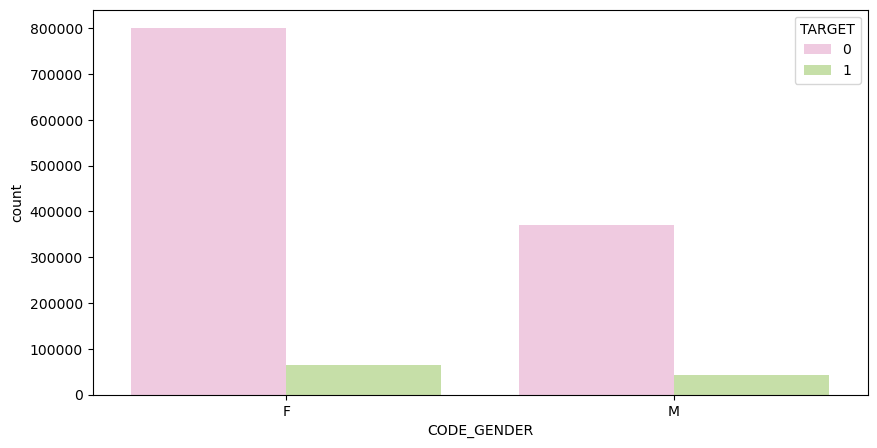

In [1218]:
plt.figure(figsize=(10,5))
sns.color_palette(palette='PiYG')
sns.barplot(data=df_1,x="CODE_GENDER",y="count",hue="TARGET",palette='PiYG')
plt.show()

In [ ]:
#data[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]].groupby("TARGET").value_counts().reset_index()

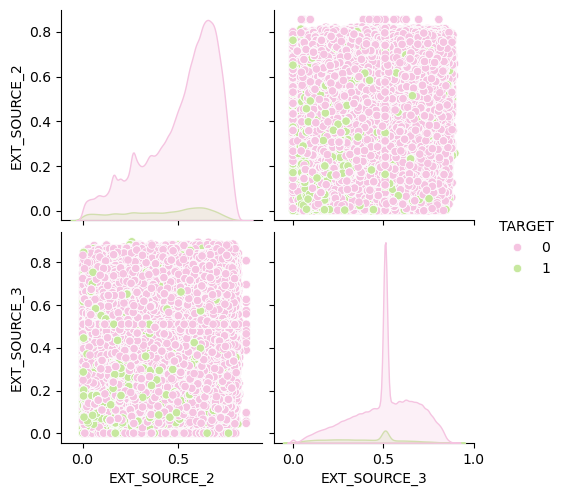

In [1223]:
sns.color_palette(palette='PiYG')
sns.pairplot(data[['TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], hue='TARGET',palette='PiYG')
plt.show()


In [1225]:
correlation = data[["EXT_SOURCE_2","EXT_SOURCE_3"]].corr()
print(correlation)

              EXT_SOURCE_2  EXT_SOURCE_3
EXT_SOURCE_2       1.00000       0.09363
EXT_SOURCE_3       0.09363       1.00000


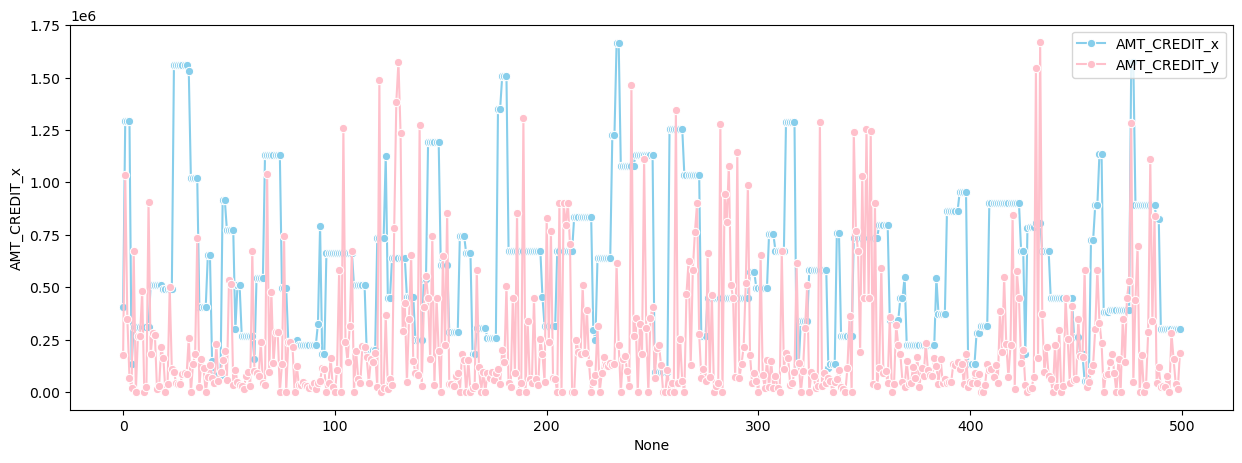

In [1229]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data.head(500),x=data.head(500).index,y="AMT_CREDIT_x",marker="o",label="AMT_CREDIT_x",color='skyblue')
sns.lineplot(data=data.head(500),x=data.head(500).index,y="AMT_CREDIT_y",marker="o",label="AMT_CREDIT_y",color='pink')
plt.show()

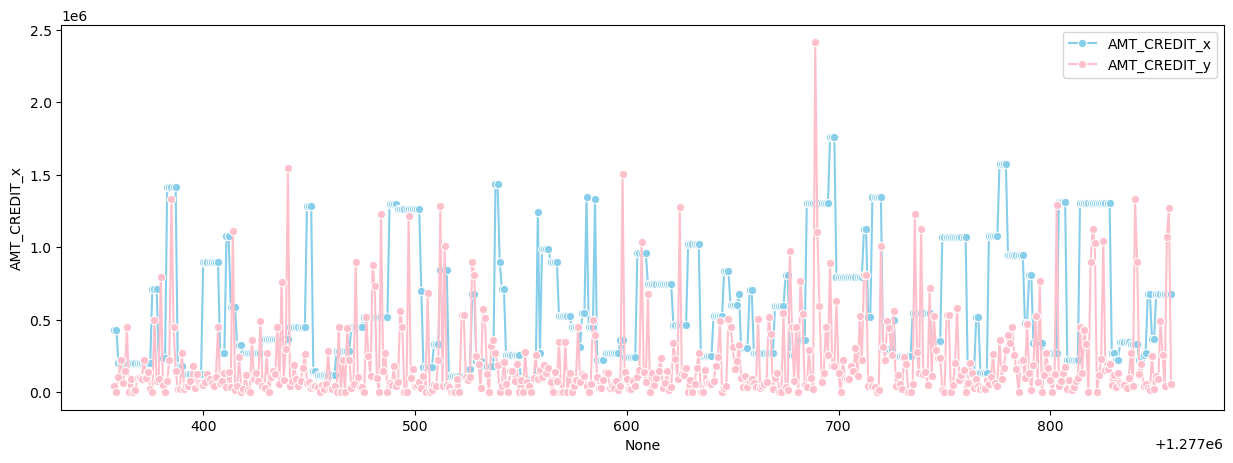

In [1231]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data.tail(500),x=data.tail(500).index,y="AMT_CREDIT_x",marker="o",label="AMT_CREDIT_x",color='skyblue')
sns.lineplot(data=data.tail(500),x=data.tail(500).index,y="AMT_CREDIT_y",marker="o",label="AMT_CREDIT_y",color='pink')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8696\2814403665.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x="OCCUPATION_TYPE",y="AMT_REQ_CREDIT_BUREAU_MON",palette='PiYG',errorbar=None)


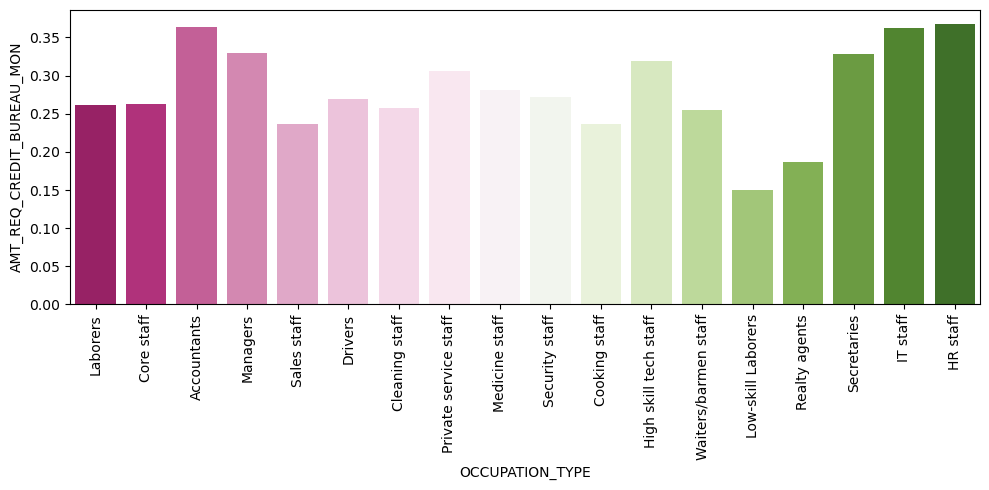

In [1233]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, ha='center')
sns.color_palette(palette='PiYG')
sns.barplot(data=data,x="OCCUPATION_TYPE",y="AMT_REQ_CREDIT_BUREAU_MON",palette='PiYG',errorbar=None)
plt.tight_layout()
plt.show()

In [345]:
# data[["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_ANNUITY_x","AMT_GOODS_PRICE_x",
#        "NAME_INCOME_TYPE","FLAG_DOCUMENT_2"]].groupby("FLAG_DOCUMENT_2").value_counts().reset_index()

In [615]:
data["NAME_INCOME_TYPE"].value_counts()

NAME_INCOME_TYPE
Working                 643512
Commercial associate    283155
Pensioner               235411
State servant            84649
Unemployed                 116
Student                     23
Maternity leave             15
Name: count, dtype: int64

In [1235]:
    df_2=data[["NAME_INCOME_TYPE","OCCUPATION_TYPE","CODE_GENDER"]].groupby("CODE_GENDER").value_counts().reset_index(name="Count")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '(F, Accountants)'),
  Text(1, 0, '(F, Cleaning staff)'),
  Text(2, 0, '(F, Cooking staff)'),
  Text(3, 0, '(F, Core staff)'),
  Text(4, 0, '(F, Drivers)'),
  Text(5, 0, '(F, HR staff)'),
  Text(6, 0, '(F, High skill tech staff)'),
  Text(7, 0, '(F, IT staff)'),
  Text(8, 0, '(F, Laborers)'),
  Text(9, 0, '(F, Low-skill Laborers)'),
  Text(10, 0, '(F, Managers)'),
  Text(11, 0, '(F, Medicine staff)'),
  Text(12, 0, '(F, Private service staff)'),
  Text(13, 0, '(F, Realty agents)'),
  Text(14, 0, '(F, Sales staff)'),
  Text(15, 0, '(F, Secretaries)'),
  Text(16, 0, '(F, Security staff)'),
  Text(17, 0, '(F, Waiters/barmen staff)'),
  Text(18, 0, '(M, Accountants)'),
  Text(19, 0, '(M, Cleaning staff)'),
  Text(20, 0, '(M, Cooking staff)'),
  Text(21, 0, '(M, Core staff)'),
  Text(22, 0, '(M, Drivers)'),
  T

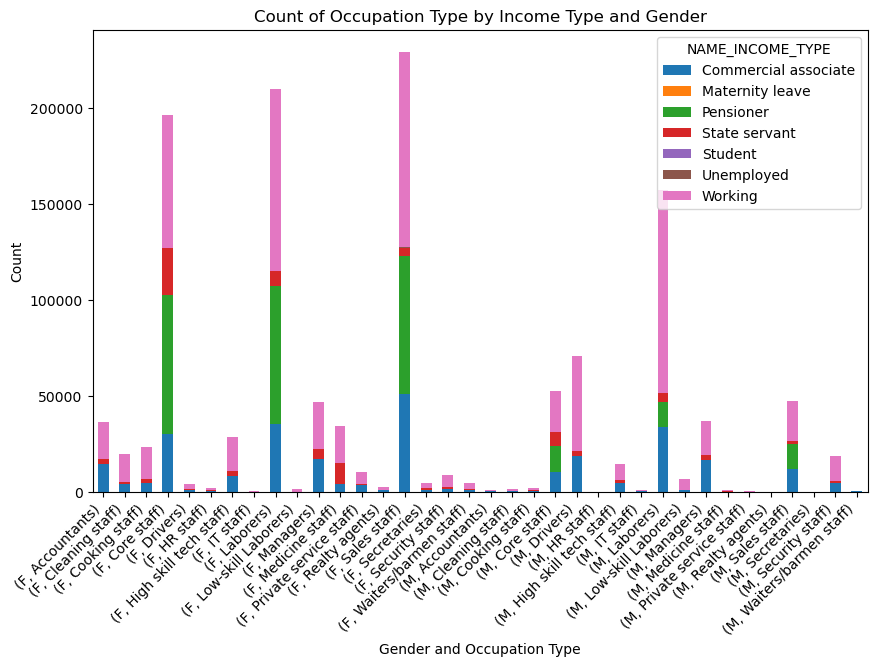

In [1237]:
# Create a pivot table for easier plotting
pivot_df = df_2.pivot_table(index=["CODE_GENDER","OCCUPATION_TYPE"], 
                              columns="NAME_INCOME_TYPE", 
                              values="Count", 
                              aggfunc="sum", fill_value=0)

# Plotting a stacked bar plot using matplotlib
pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Count of Occupation Type by Income Type and Gender')
plt.xlabel('Gender and Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')


In [1239]:
df_2

CODE_GENDER      NAME_INCOME_TYPE        OCCUPATION_TYPE   Count
0             F               Working            Sales staff  101777
1             F               Working               Laborers   94783
2             F             Pensioner             Core staff   72083
3             F             Pensioner            Sales staff   71879
4             F             Pensioner               Laborers   71872
5             F               Working             Core staff   69351
6             F  Commercial associate            Sales staff   51054
7             F  Commercial associate               Laborers   35212
8             F  Commercial associate             Core staff   30404
9             F         State servant             Core staff   24421
10            F               Working               Managers   24125
11            F               Working         Medicine staff   19643
12            F               Working            Accountants   19099
13            F               Working  High skill tech staff   17987
14            F  Commercial associate               Managers   17455
15            F               Working          Cooking staff   16512
16            F  Commercial associate            Accountants   14678
17            F               Working         Cleaning staff   14644
18            F         State servant         Medicine staff   10589
19            F  Commercial associate  High skill tech staff    8155
20            F         State servant               Laborers    7824
21            F               Working         Security staff    6508
22            F               Working  Private service staff    6248
23            F         State servant               Managers    5156
24            F  Commercial associate          Cooking staff    4779
25            F         State servant            Sales staff    4402
26            F  Commercial associate         Medicine staff    4283
27            F  Commercial associate         Cleaning staff    3969
28            F  Commercial associate  Private service staff    3863
29            F               Working   Waiters/barmen staff    3317
30            F               Working            Secretaries    2732
31            F         State servant  High skill tech staff    2594
32            F         State servant            Accountants    2559
33            F               Working                Drivers    2499
34            F         State servant          Cooking staff    1911
35            F  Commercial associate         Security staff    1740
36            F               Working          Realty agents    1589
37            F  Commercial associate   Waiters/barmen staff    1260
38            F  Commercial associate          Realty agents    1240
39            F               Working     Low-skill Laborers    1199
40            F  Commercial associate            Secretaries    1117
41            F         State servant         Cleaning staff    1100
42            F  Commercial associate                Drivers    1032
43            F         State servant            Secretaries    1031
44            F               Working               HR staff     946
45            F         State servant         Security staff     841
46            F  Commercial associate               HR staff     769
47            F         State servant                Drivers     406
48            F               Working               IT staff     286
49            F  Commercial associate     Low-skill Laborers     213
50            F         State servant   Waiters/barmen staff     196
51            F         State servant               HR staff     193
52            F         State servant  Private service staff     141
53            F  Commercial associate               IT staff     108
54            F         State servant               IT staff      95
55            F            Unemployed             Core staff      30
56            F            Unemployed            Sales staff      28
57

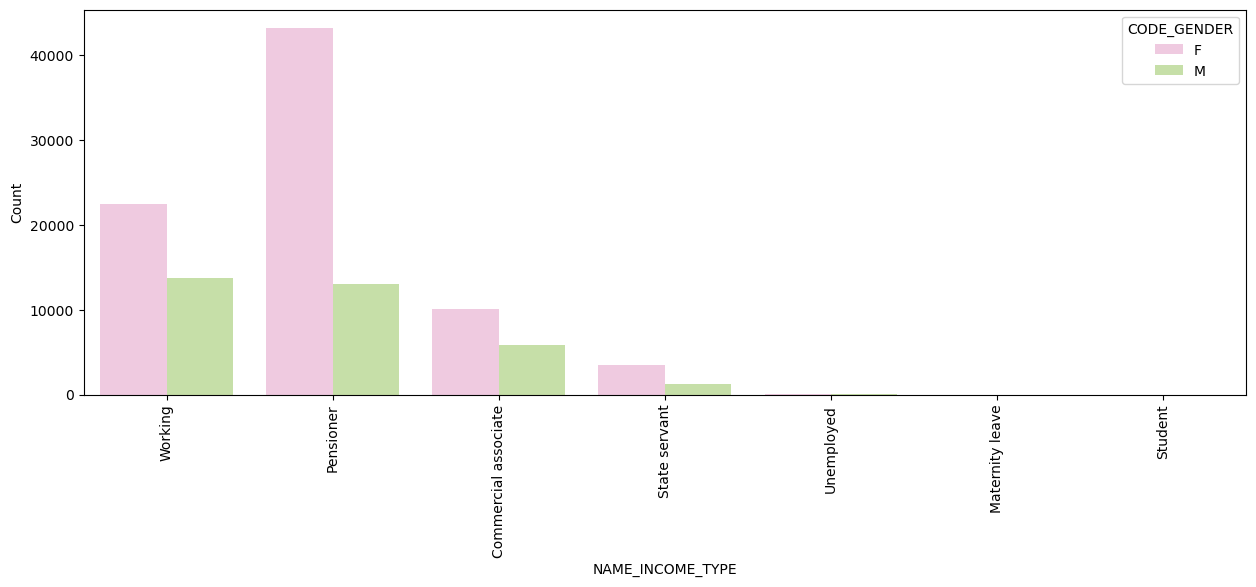

In [1241]:
plt.figure(figsize=(15,5))
sns.color_palette(palette='PiYG')
plt.xticks(rotation=90)
sns.barplot(data=df_2,x="NAME_INCOME_TYPE",y="Count",hue="CODE_GENDER",errorbar=None,palette='PiYG')
plt.show()

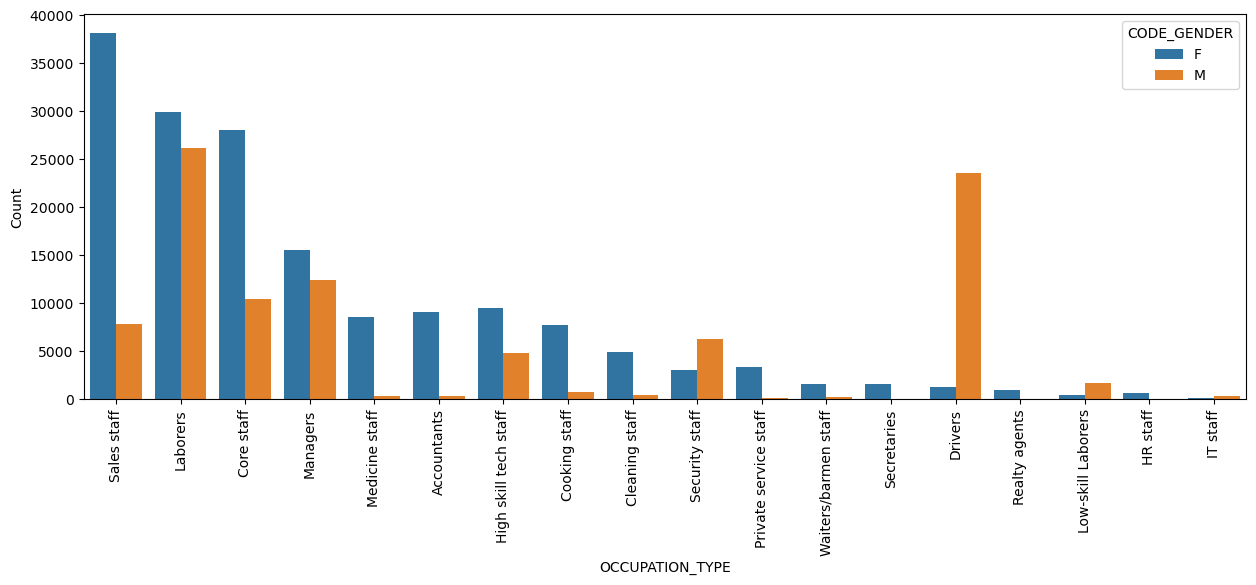

In [1243]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(data=df_2,x="OCCUPATION_TYPE",y="Count",hue="CODE_GENDER",errorbar=None)
plt.show()

In [385]:
#df_3=data[["NAME_INCOME_TYPE","OCCUPATION_TYPE"]].groupby("NAME_INCOME_TYPE").value_counts().reset_index()

In [1245]:
data[["NAME_CASH_LOAN_PURPOSE","AMT_CREDIT_x"]].groupby("AMT_CREDIT_x").value_counts().reset_index()

AMT_CREDIT_x            NAME_CASH_LOAN_PURPOSE  count
0           45000.0                               XAP    707
1           45000.0                               XNA    376
2           45000.0                      Urgent needs     13
3           45000.0                             Other     11
4           45000.0                           Repairs     10
5           45000.0                          Medicine      4
6           45000.0                         Education      3
7           45000.0                         Furniture      2
8           45000.0                 Buying a used car      1
9           45000.0                 Everyday expenses      1
10          45000.0                           Journey      1
11          45000.0           Payments on other loans      1
12          45000.0  Purchase of electronic equipment      1
13          47970.0                               XAP    570
14          47970.0                               XNA    318
15          47970.0                           Repairs     13
16          47970.0                             Other     12
17          47970.0                      Urgent needs      9
18          47970.0                 Everyday expenses      4
19          47970.0                         Education      3
20          47970.0                     Buying a home      2
21          47970.0                 Buying a used car      2
22          47970.0                          Medicine      2
23          47970.0                  Buying a new car      1
24          47970.0           Payments on other loans      1
25          48519.0                               XAP      9
26          48519.0                               XNA      1
27          49455.0                               XAP     41
28          49455.0                               XNA     16
29          49455.0                             Other      2
30          49455.0                           Repairs      1
31          49500.0                               XAP    134
32          49500.0                               XNA     54
33          49500.0                         Furniture      2
34          49500.0                             Other      2
35          49500.0                 Everyday expenses      1
36          49500.0           Payments on other loans      1
37          49500.0                           Repairs      1
38          49500.0                      Urgent needs      1
39          49752.0                               XAP    139
40          49752.0                               XNA    101
41          49752.0                     Buying a home      2
42          49752.0                           Journey      2
43          49752.0                             Other      2
44          49752.0           Payments on other loans      2
45          49752.0                           Repairs      2
46          49752.0                      Urgent needs      2
47          49752.0                 Buying a used car      1
48          50940.0                               XAP   1016
49          50940.0                               XNA    710
50          50940.0                      Urgent needs     23
51          50940.0                           Repairs     22
52          50940.0                             Other     21
53          50940.0                 Everyday expenses      5
54          50940.0           Payments on other loans      3
55          50940.0  Purchase of electronic equipment      2
56          50940.0                 Buying a used car      1
57          50940.0                          Medicine      1
58          50940.0          Wedding / gift / holiday      1
59          52128.0                               XAP    332
60          52128.0                               XNA    186
61          52128.0                             Other      7
62          52128.0                           Repairs      5
63          52128.0                      Urgent needs      4
64          52128.0           Payments on 

C:\Users\admin\AppData\Local\Temp\ipykernel_8696\1057469491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[data["TARGET"]==1]["NAME_CASH_LOAN_PURPOSE"],palette='PiYG')


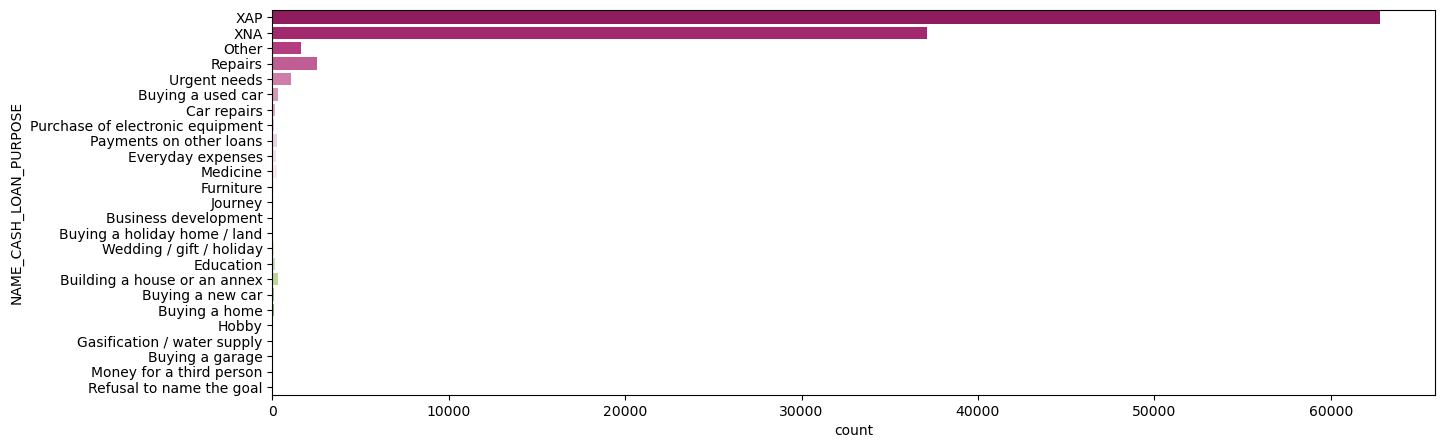

In [1247]:
plt.figure(figsize=(15,5))
sns.color_palette(palette='PiYG')
sns.countplot(data[data["TARGET"]==1]["NAME_CASH_LOAN_PURPOSE"],palette='PiYG')
plt.show() 

In [ ]:
data[["DAYS_FIRST_DUE","DAYS_LAST_DUE","OCCUPATION_TYPE"]].groupby("OCCUPATION_TYPE").value_counts().reset_index()

C:\Users\admin\AppData\Local\Temp\ipykernel_8696\3225306846.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data,x="DAYS_FIRST_DUE",y="DAYS_LAST_DUE",palette='PiYG')


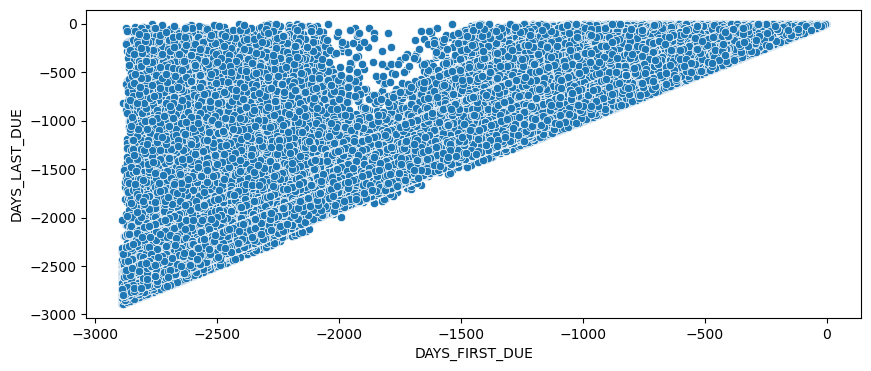

In [630]:
plt.figure(figsize=(10,4))
sns.color_palette(palette='PiYG')
sns.scatterplot(data=data,x="DAYS_FIRST_DUE",y="DAYS_LAST_DUE",palette='PiYG')
plt.xlabel("DAYS_FIRST_DUE")
plt.ylabel("DAYS_LAST_DUE")
plt.show()

In [631]:
correlation = data[["DAYS_FIRST_DUE","DAYS_LAST_DUE"]].corr()
print(correlation)

                DAYS_FIRST_DUE  DAYS_LAST_DUE
DAYS_FIRST_DUE        1.000000       0.964047
DAYS_LAST_DUE         0.964047       1.000000


In [13]:
gender=data[["AGE_GROUP","CODE_GENDER","TARGET"]].groupby("TARGET").value_counts().reset_index()

In [15]:
gender

TARGET   AGE_GROUP CODE_GENDER   count
0        0  Middle-age           F  508299
1        0  Middle-age           M  212893
2        0       Adult           F  181907
3        0       Adult           M  134408
4        0      Senior           F  110016
5        0      Senior           M   22947
6        1  Middle-age           F   37546
7        1  Middle-age           M   23418
8        1       Adult           F   20663
9        1       Adult           M   18570
10       1      Senior           F    5617
11       1      Senior           M    1574

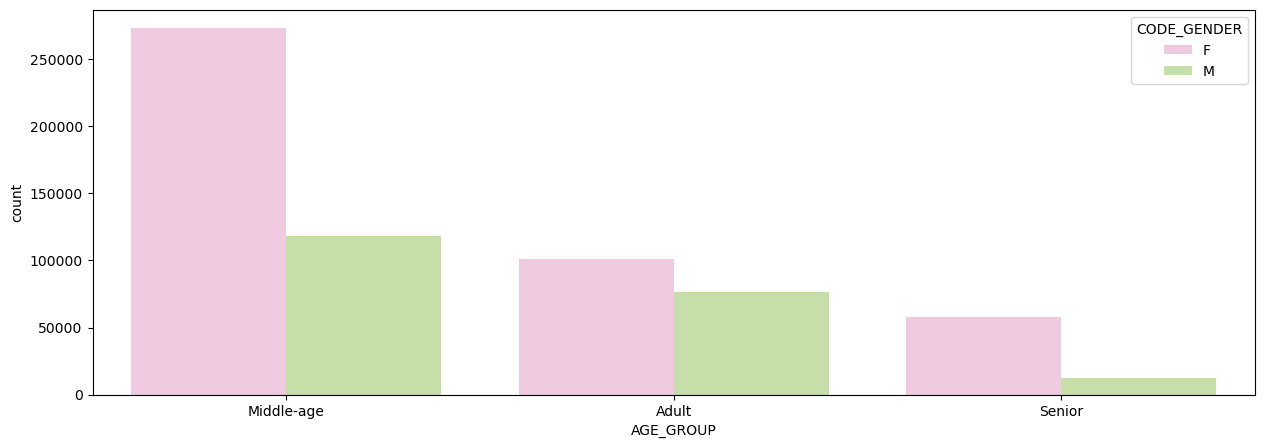

In [17]:
plt.figure(figsize=(15,5))
sns.color_palette(palette='PiYG')
sns.barplot(data=gender,x="AGE_GROUP",y="count",hue="CODE_GENDER",palette='PiYG',errorbar=None)
plt.show()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277858 entries, 0 to 1277857
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   TARGET                     1277858 non-null  int64  
 1   NAME_CONTRACT_TYPE_x       1277858 non-null  object 
 2   CODE_GENDER                1277858 non-null  object 
 3   FLAG_OWN_CAR               1277858 non-null  object 
 4   FLAG_OWN_REALTY            1277858 non-null  object 
 5   CNT_CHILDREN               1277858 non-null  int64  
 6   AMT_INCOME_TOTAL           1277858 non-null  float64
 7   AMT_CREDIT_x               1277858 non-null  float64
 8   AMT_ANNUITY_x              1277858 non-null  float64
 9   AMT_GOODS_PRICE_x          1277858 non-null  float64
 10  NAME_INCOME_TYPE           1277858 non-null  object 
 11  DAYS_EMPLOYED              1277858 non-null  float64
 12  FLAG_EMP_PHONE             1277858 non-null  int64  
 13  FLAG_EMAIL  

In [23]:
data[["CODE_GENDER","AMT_INCOME_TOTAL","AMT_CREDIT_x"]].groupby("AMT_CREDIT_x").value_counts().reset_index()

AMT_CREDIT_x CODE_GENDER  AMT_INCOME_TOTAL  count
0           45000.0           F           67500.0    124
1           45000.0           F           90000.0    118
2           45000.0           F          112500.0    109
3           45000.0           M          180000.0     49
4           45000.0           F           54000.0     41
...             ...         ...               ...    ...
76400     3150000.0           M          727870.0      1
76401     3375000.0           M          225000.0      1
76402     3860019.0           F          292050.0      1
76403     3956274.0           F          749331.0      1
76404     4050000.0           F         1307588.0      1

[76405 rows x 4 columns]

In [45]:
total_sum=data[["CODE_GENDER","AMT_INCOME_TOTAL"]].groupby("CODE_GENDER").agg(
    Total_income =("AMT_INCOME_TOTAL","sum"),
    Gender_count=("CODE_GENDER","count")
).reset_index()

In [41]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [47]:
total_sum

CODE_GENDER  Total_income  Gender_count
0           F  138956605704        864048
1           M   81099408852        413810

# ENCODING

In [49]:
data_copy = data.copy()

In [51]:
col=data.select_dtypes(include="object").columns

In [53]:
col

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
       'NAME_CASH_LOAN_PURPOSE', 'AGE_GROUP'],
      dtype='object')

In [55]:
le = LabelEncoder()

In [57]:
label_encoder ={}

In [59]:
for i in col:
    data[i] = le.fit_transform(data[i])
    label_encoder[i] = le

In [60]:
label_encoder

{'NAME_CONTRACT_TYPE_x': LabelEncoder(),
 'CODE_GENDER': LabelEncoder(),
 'FLAG_OWN_CAR': LabelEncoder(),
 'FLAG_OWN_REALTY': LabelEncoder(),
 'NAME_INCOME_TYPE': LabelEncoder(),
 'OCCUPATION_TYPE': LabelEncoder(),
 'NAME_CASH_LOAN_PURPOSE': LabelEncoder(),
 'AGE_GROUP': LabelEncoder()}

In [63]:
# Save the dictionary of label encoders
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [65]:
data.head()

TARGET  NAME_CONTRACT_TYPE_x  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                     0            1             0                1   
1       0                     0            0             0                0   
2       0                     0            0             0                0   
3       0                     0            0             0                0   
4       0                     1            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0             0            202500        406598          24700   
1             0            270000       1293502          35698   
2             0            270000       1293502          35698   
3             0            270000       1293502          35698   
4             0             67500        135000           6750   

   AMT_GOODS_PRICE_x  ...  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_2  \
0             351000  ...             0             0                0   
1            1129500  ...             1             1                0   
2            1129500  ...             1             1                0   
3            1129500  ...             1             1                0   
4             135000  ...             1             1                0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_CREDIT_y  NAME_CASH_LOAN_PURPOSE  \
0                          0        179055                      23   
1                          0       1035882                      24   
2                          0        348638                      23   
3                          0         68054                      23   
4                          0         20106                      23   

   DAYS_FIRST_DUE  DAYS_LAST_DUE  AGE  AGE_GROUP  
0            -565            -25   25          0  
1            -716           -536   45          1  
2            -797           -647   45          1  
3           -2310          -1980   45          1  
4            -784           -724   52          1  

[5 rows x 26 columns]

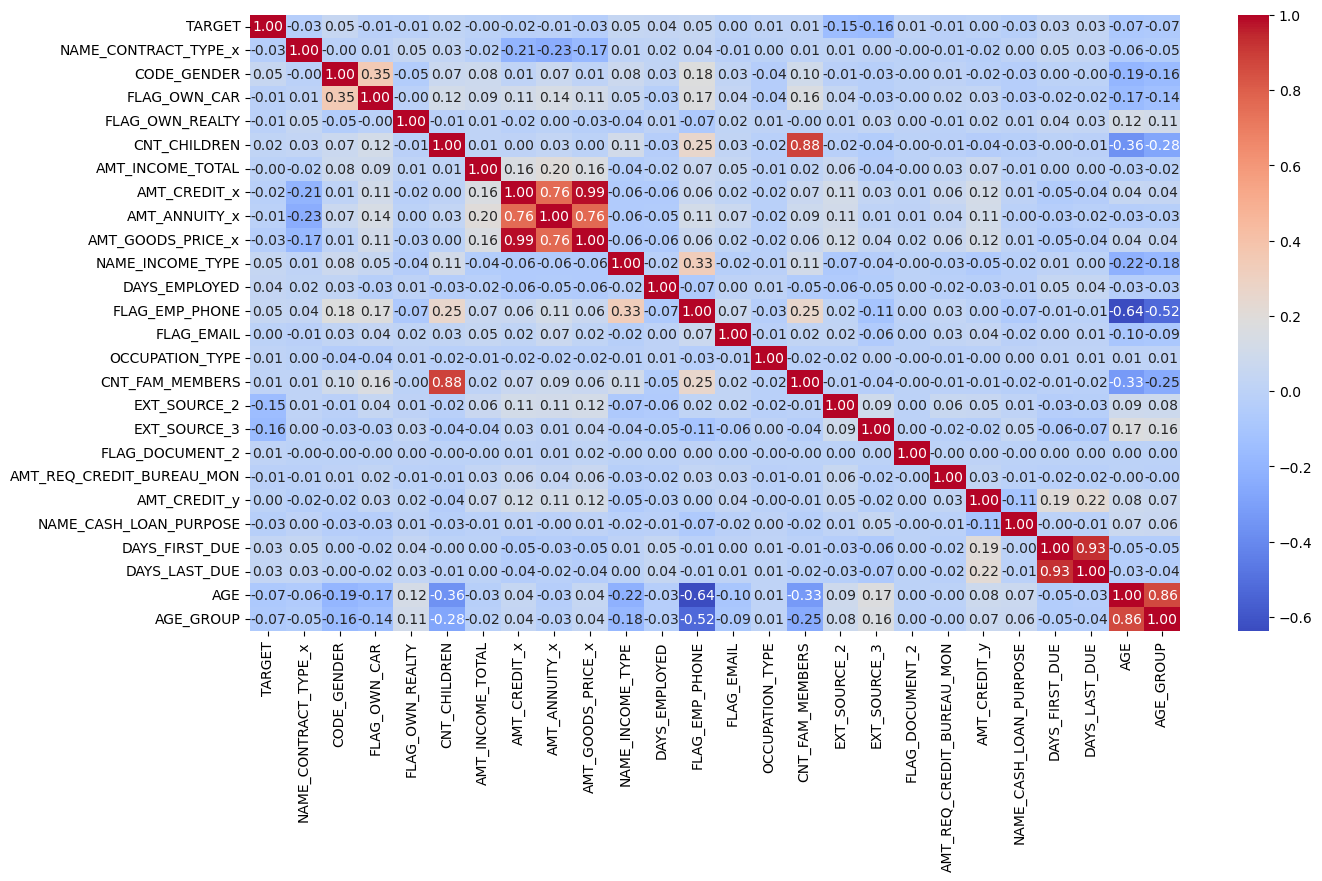

In [67]:
#heatmap

plt.figure(figsize=(15,8))
data_1=data.corr()
sns.heatmap(data=data_1,annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [69]:
#dropping one of the features which are correlated each other
data.drop(["AMT_ANNUITY_x","AMT_GOODS_PRICE_x","CNT_CHILDREN","DAYS_FIRST_DUE","AGE"],axis=1,inplace=True)

In [71]:
data.head()

TARGET  NAME_CONTRACT_TYPE_x  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                     0            1             0                1   
1       0                     0            0             0                0   
2       0                     0            0             0                0   
3       0                     0            0             0                0   
4       0                     1            1             1                1   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  NAME_INCOME_TYPE  DAYS_EMPLOYED  \
0            202500        406598                 6           -637   
1            270000       1293502                 3          -1188   
2            270000       1293502                 3          -1188   
3            270000       1293502                 3          -1188   
4             67500        135000                 6           -225   

   FLAG_EMP_PHONE  ...  OCCUPATION_TYPE  CNT_FAM_MEMBERS  EXT_SOURCE_2  \
0               1  ...                8                1             0   
1               1  ...                3                2             1   
2               1  ...                3                2             1   
3               1  ...                3                2             1   
4               1  ...                8                1             1   

   EXT_SOURCE_3  FLAG_DOCUMENT_2  AMT_REQ_CREDIT_BUREAU_MON  AMT_CREDIT_y  \
0             0                0                          0        179055   
1             1                0                          0       1035882   
2             1                0                          0        348638   
3             1                0                          0         68054   
4             1                0                          0         20106   

   NAME_CASH_LOAN_PURPOSE  DAYS_LAST_DUE  AGE_GROUP  
0                      23            -25          0  
1                      24           -536          1  
2                      23           -647          1  
3                      23          -1980          1  
4                      23           -724          1  

[5 rows x 21 columns]

In [73]:
data.shape

(1277858, 21)

# OUTLIERS DETECTION

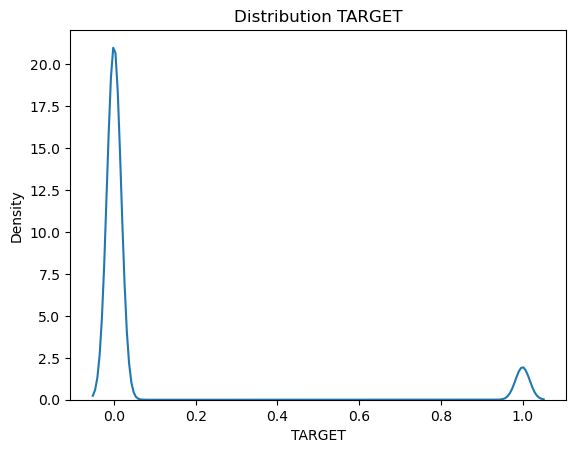

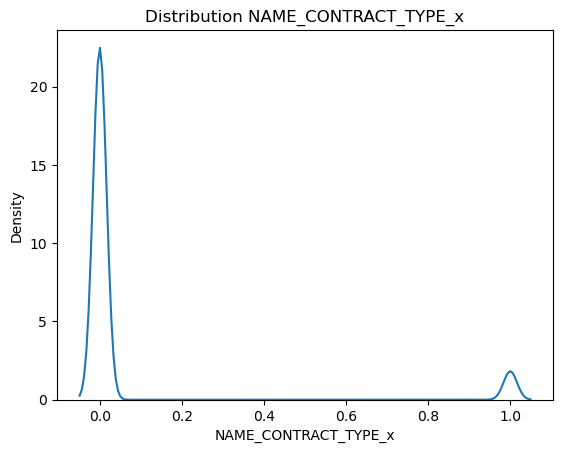

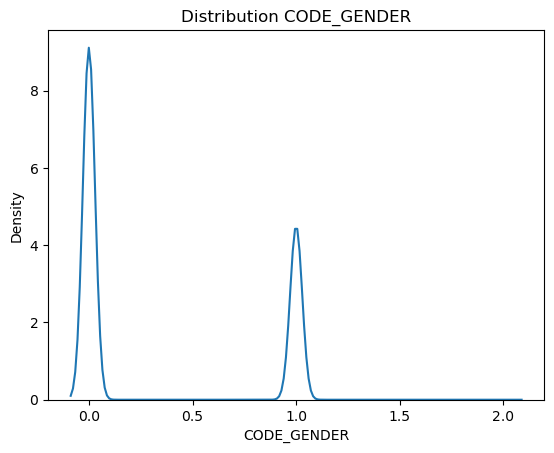

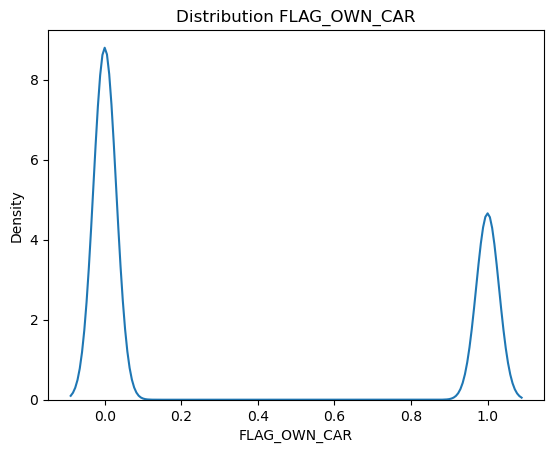

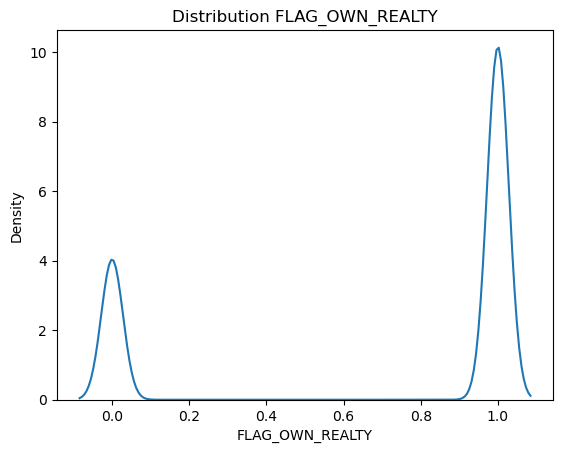

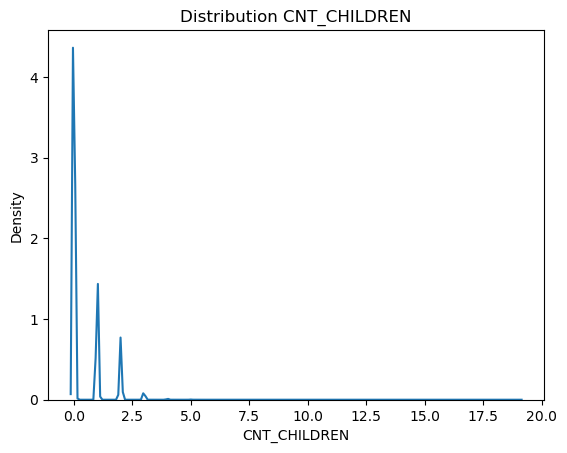

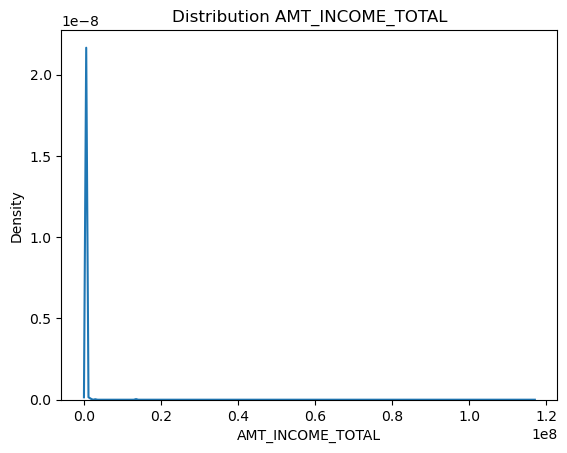

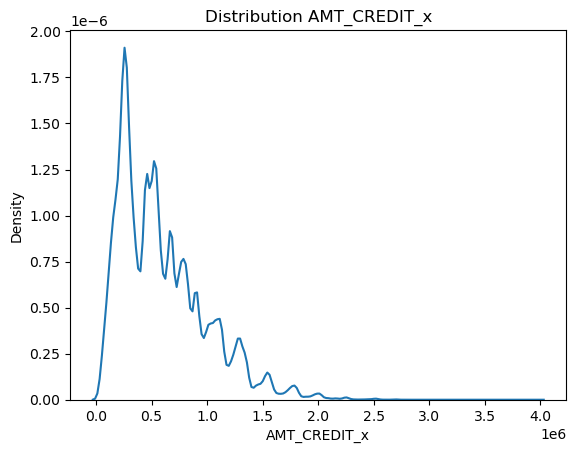

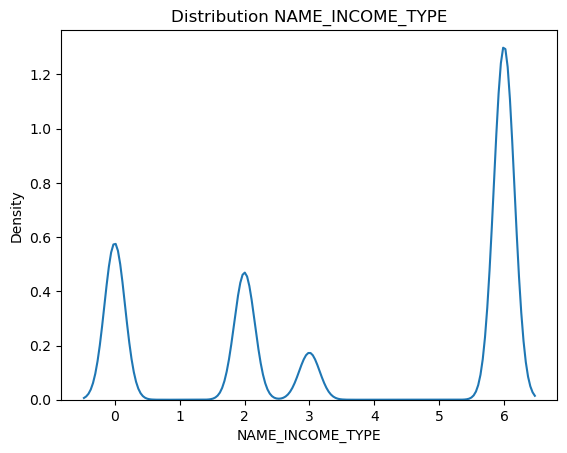

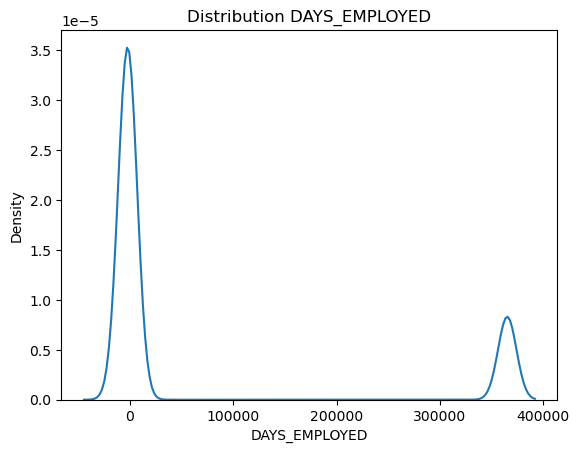

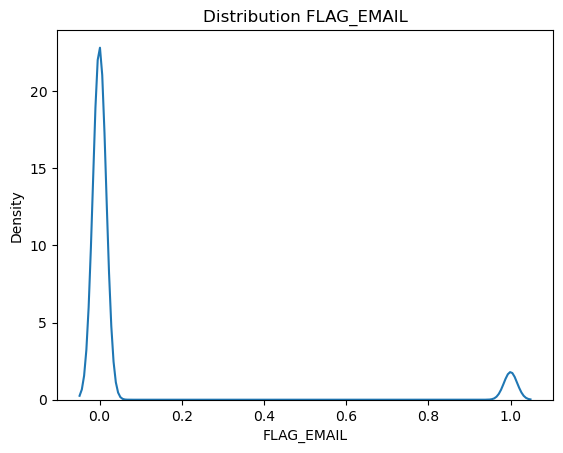

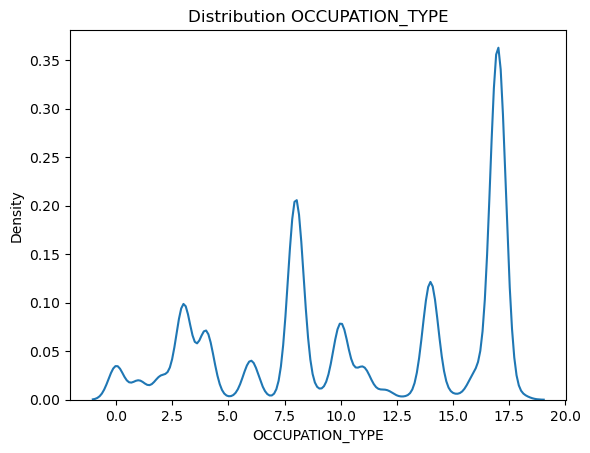

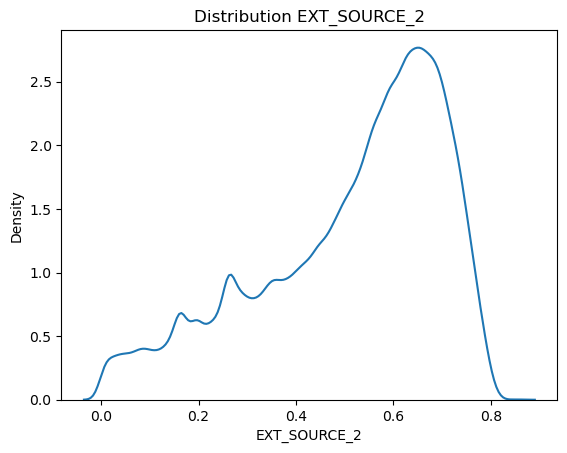

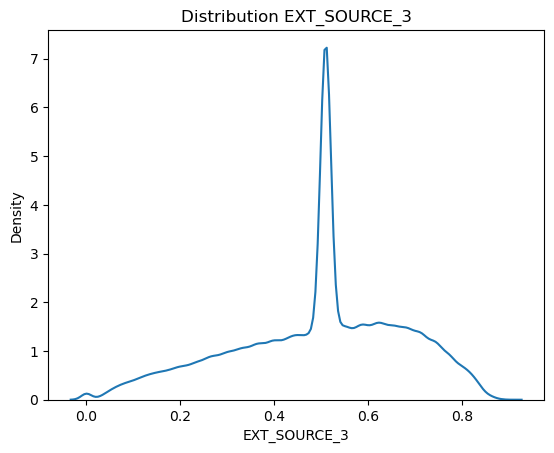

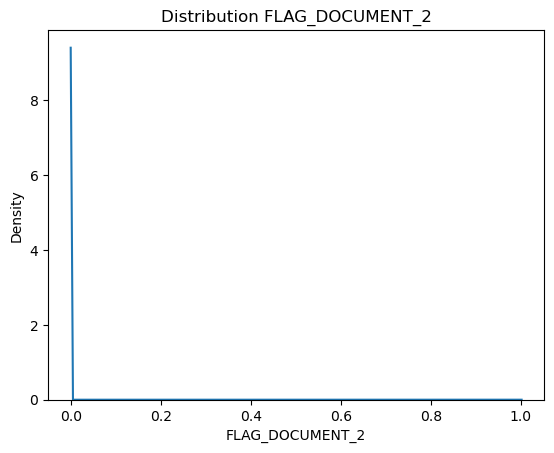

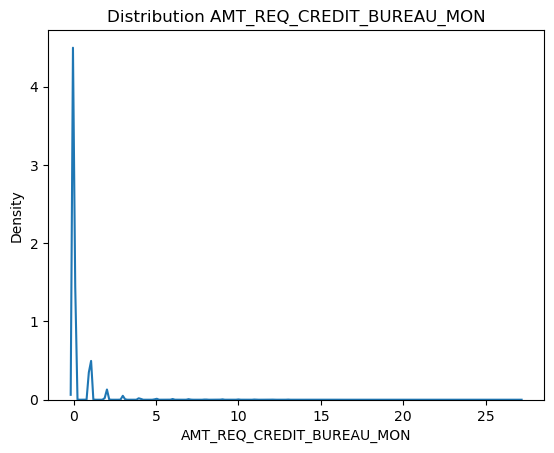

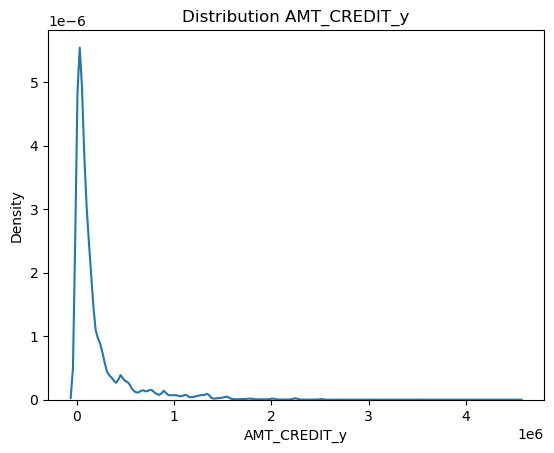

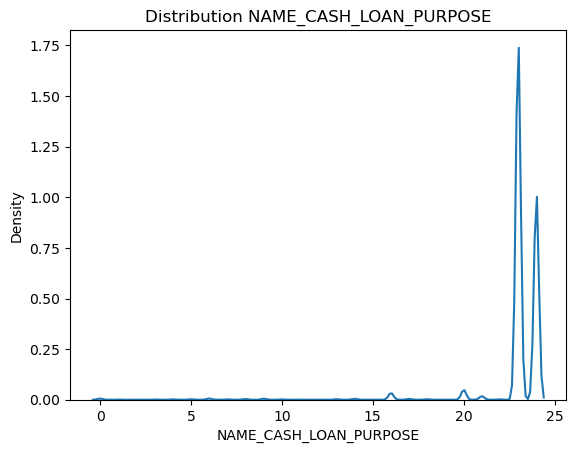

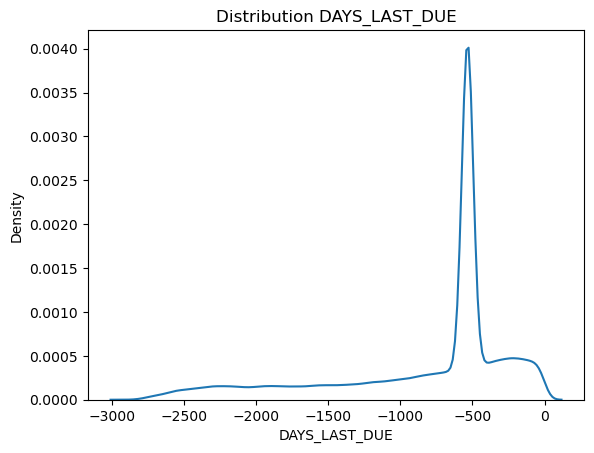

In [303]:
#plotting kde plots

for i in data.columns:
    sns.kdeplot(data[i])
    plt.title("Distribution "+str(i))
    plt.show()

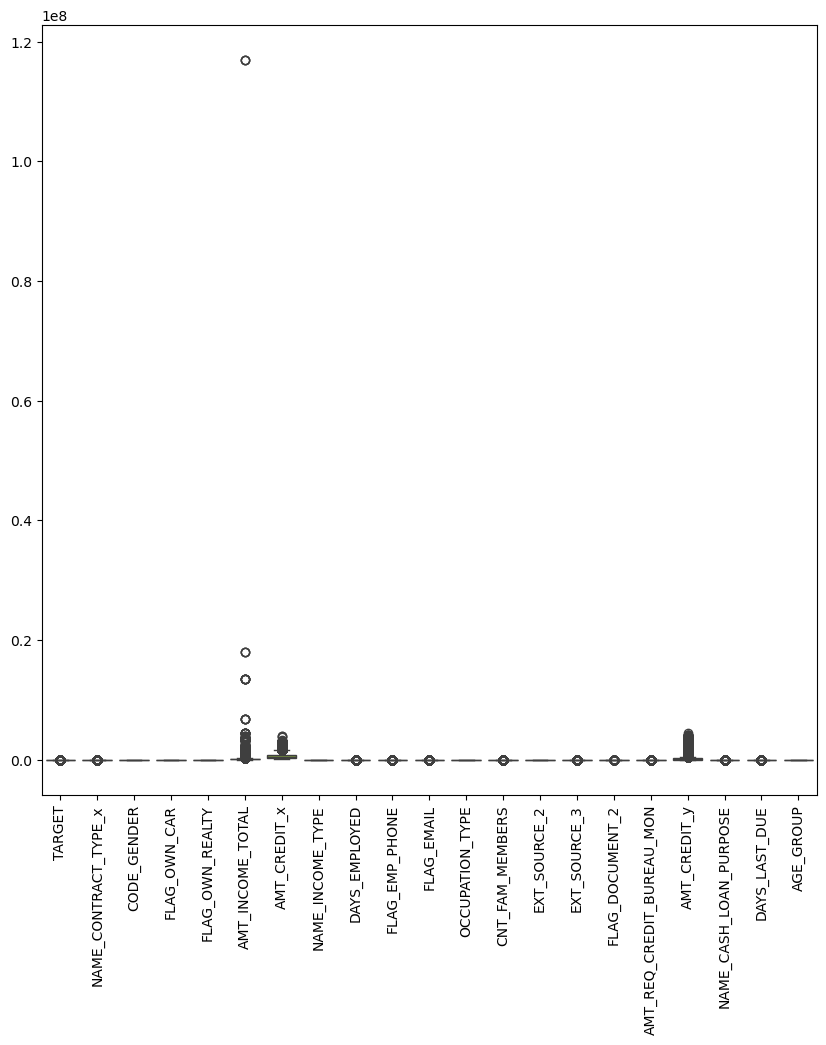

In [75]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.boxplot(data=data)
plt.show()

<Axes: ylabel='AMT_INCOME_TOTAL'>

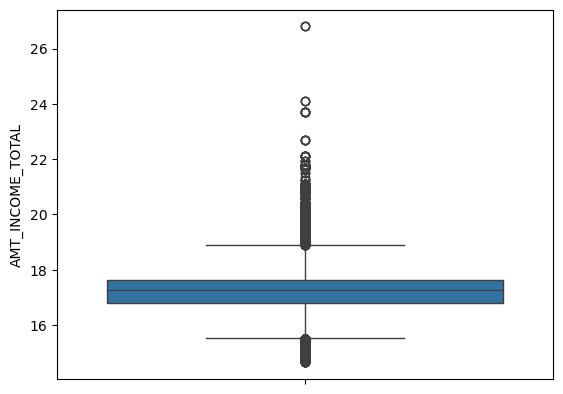

In [77]:
sns.boxplot(data["AMT_INCOME_TOTAL"].apply(lambda x :np.log2(x)))

In [83]:
# sns.boxplot(data["AMT_INCOME_TOTAL"].apply(lambda x :1/x))

In [85]:
a,_=boxcox(data["AMT_INCOME_TOTAL"])

In [234]:
#data["AMT_INCOME_TOTAL"] =a

In [99]:
data["AMT_INCOME_TOTAL"] = data["AMT_INCOME_TOTAL"].apply(lambda x :np.log2(x))

C:\Users\admin\AppData\Local\Temp\ipykernel_14644\3475769911.py:1: RuntimeWarning: divide by zero encountered in log2
  sns.boxplot(data["AMT_CREDIT_y"].apply(lambda x :np.log2(x)))


<Axes: ylabel='AMT_CREDIT_y'>

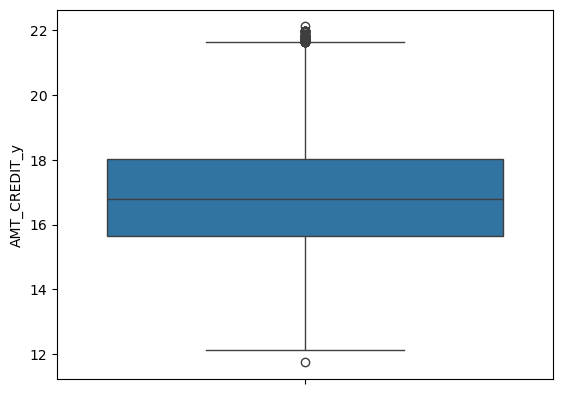

In [105]:
sns.boxplot(data["AMT_CREDIT_y"].apply(lambda x :np.log2(x)))

In [107]:
data["AMT_CREDIT_y"]=data["AMT_CREDIT_y"].apply(lambda x :np.log2(x))

C:\Users\admin\AppData\Local\Temp\ipykernel_14644\3042872286.py:1: RuntimeWarning: divide by zero encountered in log2
  data["AMT_CREDIT_y"]=data["AMT_CREDIT_y"].apply(lambda x :np.log2(x))


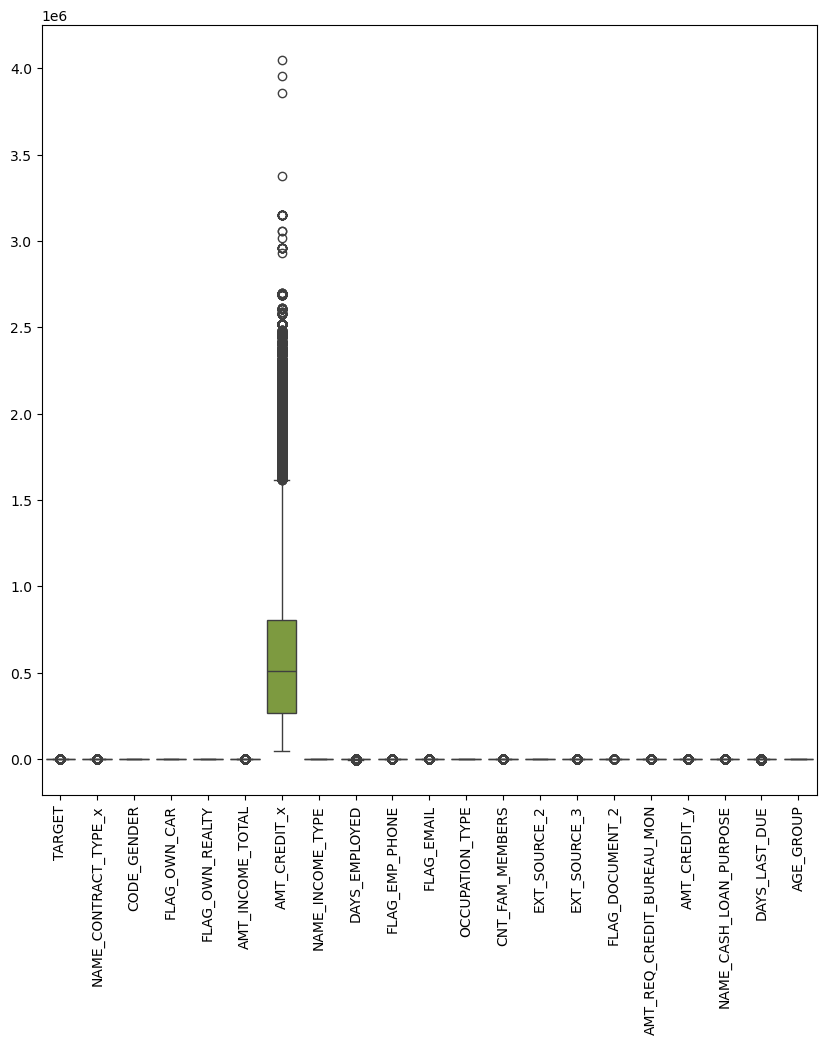

In [109]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.boxplot(data=data)
plt.show()

<Axes: ylabel='AMT_CREDIT_x'>

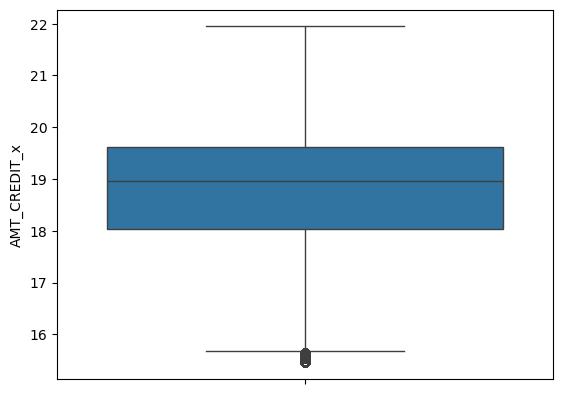

In [111]:
sns.boxplot(data["AMT_CREDIT_x"].apply(lambda x :np.log2(x)))

In [113]:
data["AMT_CREDIT_x"]=data["AMT_CREDIT_x"].apply(lambda x :np.log2(x))

In [577]:
# def outliers(data, column):
#     q1 = data[column].quantile(0.25)
#     q3 = data[column].quantile(0.75)
#     IQR = q3 - q1
#     lower = q1 - 1.5 * IQR
#     upper = q3 + 1.5 * IQR
#     return data[(data[column] >= lower) & (data[column] <= upper)]

# # Use the function to filter outliers in the "AMT_CREDIT_x" column
# filtered_data = outliers(data, "AMT_CREDIT_x")
# data['AMT_CREDIT_x'] = filtered_data['AMT_CREDIT_x']

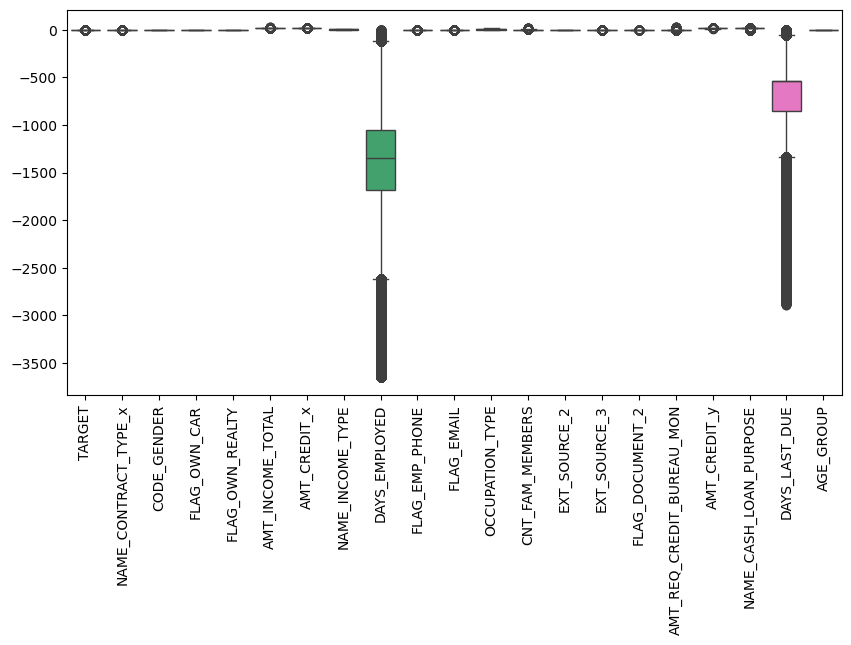

In [115]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(data=data)
plt.show()

In [117]:
data.shape

(1277858, 21)

In [119]:
data.isnull().sum()

TARGET                       0
NAME_CONTRACT_TYPE_x         0
CODE_GENDER                  0
FLAG_OWN_CAR                 0
FLAG_OWN_REALTY              0
AMT_INCOME_TOTAL             0
AMT_CREDIT_x                 0
NAME_INCOME_TYPE             0
DAYS_EMPLOYED                0
FLAG_EMP_PHONE               0
FLAG_EMAIL                   0
OCCUPATION_TYPE              0
CNT_FAM_MEMBERS              0
EXT_SOURCE_2                 0
EXT_SOURCE_3                 0
FLAG_DOCUMENT_2              0
AMT_REQ_CREDIT_BUREAU_MON    0
AMT_CREDIT_y                 0
NAME_CASH_LOAN_PURPOSE       0
DAYS_LAST_DUE                0
AGE_GROUP                    0
dtype: int64

In [5]:
# saving the final file
output_path ="eda.csv"
data.to_csv(output_path, index=False)

# FEATURE IMPORTANCES

In [2]:
input_path ="eda.csv"
df=pd.read_csv(input_path)

In [4]:
df.shape

(1277858, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277858 entries, 0 to 1277857
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   TARGET                     1277858 non-null  int64  
 1   NAME_CONTRACT_TYPE_x       1277858 non-null  int64  
 2   CODE_GENDER                1277858 non-null  int64  
 3   FLAG_OWN_CAR               1277858 non-null  int64  
 4   FLAG_OWN_REALTY            1277858 non-null  int64  
 5   AMT_INCOME_TOTAL           1277858 non-null  float64
 6   AMT_CREDIT_x               1277858 non-null  float64
 7   NAME_INCOME_TYPE           1277858 non-null  int64  
 8   DAYS_EMPLOYED              1277858 non-null  float64
 9   FLAG_EMP_PHONE             1277858 non-null  int64  
 10  FLAG_EMAIL                 1277858 non-null  int64  
 11  OCCUPATION_TYPE            1277858 non-null  int64  
 12  CNT_FAM_MEMBERS            1277858 non-null  float64
 13  EXT_SOURCE_2

In [5]:
# Treating infinity values

print(np.isinf(df).sum().sum())

158652


In [7]:
# Replace infinite values with NaN and treating with median
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True)

In [9]:
print(np.isinf(df).sum().sum())

0


In [9]:
#Splitting dependent and independent features

X= df.drop("TARGET",axis=1)
y= df["TARGET"]

In [89]:
X.shape

(1277858, 20)

In [11]:
y.shape

(1277858,)

In [93]:
fs = RandomForestClassifier()

In [95]:
fs.fit(X,y)

RandomForestClassifier()

In [97]:
fs.feature_importances_

array([0.00506241, 0.00851836, 0.01329427, 0.01806849, 0.10041968,
       0.13765796, 0.01534617, 0.11637623, 0.00316338, 0.00921394,
       0.04890478, 0.04030524, 0.17944779, 0.14641767, 0.00023885,
       0.01927071, 0.06357004, 0.01401555, 0.04441064, 0.01629783])

In [99]:
fs_score = pd.DataFrame({
    "columns":X.columns,
    "score":fs.feature_importances_
}).sort_values("score",ascending=False)

In [183]:
#pd.reset_option('display.float_format')

In [101]:
fs_score

columns     score
12               EXT_SOURCE_2  0.179448
13               EXT_SOURCE_3  0.146418
5                AMT_CREDIT_x  0.137658
7               DAYS_EMPLOYED  0.116376
4            AMT_INCOME_TOTAL  0.100420
16               AMT_CREDIT_y  0.063570
10            OCCUPATION_TYPE  0.048905
18              DAYS_LAST_DUE  0.044411
11            CNT_FAM_MEMBERS  0.040305
15  AMT_REQ_CREDIT_BUREAU_MON  0.019271
3             FLAG_OWN_REALTY  0.018068
19                  AGE_GROUP  0.016298
6            NAME_INCOME_TYPE  0.015346
17     NAME_CASH_LOAN_PURPOSE  0.014016
2                FLAG_OWN_CAR  0.013294
9                  FLAG_EMAIL  0.009214
1                 CODE_GENDER  0.008518
0        NAME_CONTRACT_TYPE_x  0.005062
8              FLAG_EMP_PHONE  0.003163
14            FLAG_DOCUMENT_2  0.000239

In [103]:
selected_features=list(fs_score.sort_values("score",ascending=False).head(15)["columns"].values)

In [105]:
X1 =X[selected_features]

In [13]:
X1 =X[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_CREDIT_x', 'DAYS_EMPLOYED',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_y', 'OCCUPATION_TYPE', 'DAYS_LAST_DUE',
       'CNT_FAM_MEMBERS', 'AMT_REQ_CREDIT_BUREAU_MON','FLAG_OWN_REALTY','AGE_GROUP','NAME_INCOME_TYPE',
       'NAME_CASH_LOAN_PURPOSE','FLAG_OWN_CAR']]

In [15]:
X1.columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_CREDIT_x', 'DAYS_EMPLOYED',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_y', 'OCCUPATION_TYPE', 'DAYS_LAST_DUE',
       'CNT_FAM_MEMBERS', 'AMT_REQ_CREDIT_BUREAU_MON', 'FLAG_OWN_REALTY',
       'AGE_GROUP', 'NAME_INCOME_TYPE', 'NAME_CASH_LOAN_PURPOSE',
       'FLAG_OWN_CAR'],
      dtype='object')

In [17]:
X1.shape             

(1277858, 15)

In [21]:
y.value_counts()

TARGET
0    1170470
1     107388
Name: count, dtype: int64

In [23]:
# Doing over sampling to balance the data

ro = RandomOverSampler()
X2,y1 = ro.fit_resample(X1,y)

In [246]:

# smote=SMOTE()
# X2,y1 = smote.fit_resample(X1,y)

In [25]:
y1.value_counts()

TARGET
1    1170470
0    1170470
Name: count, dtype: int64

In [ ]:
#removing unwanted encoding features

In [19]:
X2.head()

EXT_SOURCE_2  EXT_SOURCE_3  AMT_CREDIT_x  DAYS_EMPLOYED  AMT_INCOME_TOTAL  \
0      0.262949      0.139376     18.633242         -637.0         17.627562   
1      0.622246      0.510090     20.302851        -1188.0         18.042600   
2      0.622246      0.510090     20.302851        -1188.0         18.042600   
3      0.622246      0.510090     20.302851        -1188.0         18.042600   
4      0.555912      0.729567     17.042600         -225.0         16.042600   

   AMT_CREDIT_y  OCCUPATION_TYPE  DAYS_LAST_DUE  CNT_FAM_MEMBERS  \
0     17.450043                8          -25.0              1.0   
1     19.982428                3         -536.0              2.0   
2     18.411368                3         -647.0              2.0   
3     16.054382                3        -1980.0              2.0   
4     14.295338                8         -724.0              1.0   

   AMT_REQ_CREDIT_BUREAU_MON  FLAG_OWN_REALTY  AGE_GROUP  NAME_INCOME_TYPE  \
0                        0.0                1          0                 6   
1                        0.0                0          1                 3   
2                        0.0                0          1                 3   
3                        0.0                0          1                 3   
4                        0.0                1          1                 6   

   NAME_CASH_LOAN_PURPOSE  FLAG_OWN_CAR  
0                      23             0  
1                      24             0  
2                      23             0  
3                      23             0  
4                      23             1

In [27]:
# train test split
X2_train,X2_test,y1_train,y1_test = train_test_split(X2,y1,test_size=0.2,random_state=54)

In [23]:
X2_train.shape

(1872752, 15)

In [25]:
X2_test.shape

(468188, 15)

# MODEL BUILDING

In [256]:
#DECISION TREE
dt = DecisionTreeClassifier(max_depth=4,random_state=54)

In [258]:
dt.fit(X2_train,y1_train)

DecisionTreeClassifier(max_depth=4, random_state=54)

In [259]:
dttrain_predict =dt.predict(X2_train)
dttest_predict =dt.predict(X2_test)

In [29]:
def metrics(actual,predicted):
    print("accuracy:",round(accuracy_score(actual,predicted)*100,2))
    print("precision:",round(precision_score(actual,predicted)*100,2))
    print("recall:",round(recall_score(actual,predicted)*100,2))
    print("f1:",round(f1_score(actual,predicted)*100,2))
    print("roc_curve:",round(roc_auc_score(actual,predicted)*100,2))
    print("classification",confusion_matrix(actual,predicted))

In [260]:
metrics(y1_train,dttrain_predict)
metrics(y1_test,dttest_predict)


accuracy: 68.28
precision: 65.56
recall: 76.99
f1: 70.82
roc_curve: 68.28
classification [[557783 378649]
 [215477 720843]]
accuracy: 68.34
precision: 65.64
recall: 77.0
f1: 70.87
roc_curve: 68.34
classification [[139657  94381]
 [ 53857 180293]]


# RANDOM FOREST

In [47]:
rf = RandomForestClassifier(n_estimators=500,random_state=54,max_depth=5)

In [49]:
rf.fit(X2_train,y1_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=54)

In [50]:
rftrain_predict = rf.predict(X2_train)
rftest_predict =rf.predict(X2_test)

In [51]:
metrics(y1_train,rftrain_predict)
metrics(y1_test,rftest_predict)

accuracy: 66.28
precision: 66.38
recall: 65.97
f1: 66.17
roc_curve: 66.28
classification [[623562 312870]
 [318614 617706]]
accuracy: 66.32
precision: 66.47
recall: 65.87
f1: 66.17
roc_curve: 66.32
classification [[156254  77784]
 [ 79918 154232]]


# GRADIENT BOOST

In [29]:
gb =GradientBoostingClassifier(n_estimators=700,random_state=54)

In [31]:
gb.fit(X2_train,y1_train)

GradientBoostingClassifier(n_estimators=700, random_state=54)

In [32]:
gbtrain_predict =gb.predict(X2_train)
gbtest_predict= gb.predict(X2_test)

In [33]:
metrics(y1_train,gbtrain_predict)
metrics(y1_test,gbtest_predict)

accuracy: 69.21
precision: 69.47
recall: 68.54
f1: 69.0
roc_curve: 69.21
classification [[654468 281964]
 [294579 641741]]
accuracy: 69.16
precision: 69.47
recall: 68.4
f1: 68.93
roc_curve: 69.16
classification [[163656  70382]
 [ 74003 160147]]


In [ ]:
# EXTREME GRAIDENT BOOSTING

In [31]:
xg = xgb.XGBClassifier(n_estimators=1500,random_state=54,learning_rate=0.17,max_depth=7)

In [33]:
xg.fit(X2_train,y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, random_state=54, ...)

In [34]:
xgtrain_predict =xg.predict(X2_train)
xgtest_predict= xg.predict(X2_test)


In [35]:
metrics(y1_train,xgtrain_predict)
metrics(y1_test,xgtest_predict)

accuracy: 95.11
precision: 93.86
recall: 96.54
f1: 95.18
roc_curve: 95.11
classification [[877267  59165]
 [ 32431 903889]]
accuracy: 94.36
precision: 92.84
recall: 96.14
f1: 94.46
roc_curve: 94.36
classification [[216679  17359]
 [  9029 225121]]


In [39]:
# Saving the model

with open("xg.pkl","wb") as file:
    pickle.dump(xg,file)

In [ ]:
# Cross validation

In [75]:
# Initialize the XGBoost model with tuned parameters( Automated cross_validate)
xg = xgb.XGBClassifier(
    random_state=54, 
    n_estimators=1500, 
    learning_rate=0.17,
    max_depth=7
    
    
)


# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',  # use 'precision_macro' if you want unweighted
    'recall': 'recall_macro',        # use 'recall_macro' if you want unweighted
    'f1': 'f1_macro'                  # use 'f1_macro' if you want unweighted
}

# Perform 5-fold cross-validation with multiple metrics
cv_results = cross_validate(xg, X2, y1, cv=5, scoring=scoring)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=54)

# Print results
print("Accuracy scores for each fold:",[round(score * 100, 2) for score in cv_results['test_accuracy']])
print("Precision scores for each fold:", [round(score * 100, 2) for score in cv_results['test_precision']])
print("Recall scores for each fold:", [round(score * 100, 2) for score in cv_results['test_recall']])
print("F1 scores for each fold:", [round(score * 100, 2) for score in cv_results['test_f1']])



# Print the average of each metric
print("Average Accuracy:", round(cv_results['test_accuracy'].mean()*100,2))
print("Average Precision:", round(cv_results['test_precision'].mean()*100,2))
print("Average Recall:", round(cv_results['test_recall'].mean()*100,2))
print("Average F1 Score:", round(cv_results['test_f1'].mean()*100,2))

Accuracy scores for each fold: [92.0, 91.96, 91.85, 92.18, 91.99]
Precision scores for each fold: [92.3, 92.29, 92.18, 92.46, 92.31]
Recall scores for each fold: [92.0, 91.96, 91.85, 92.18, 91.99]
F1 scores for each fold: [91.99, 91.95, 91.84, 92.16, 91.98]
Average Accuracy: 92.0
Average Precision: 92.31
Average Recall: 92.0
Average F1 Score: 91.98


In [77]:
# Initialize Manual StratifiedKFold 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your model (for example, RandomForestClassifier)
xg = xgb.XGBClassifier(
    random_state=54, 
    n_estimators=1500, 
    learning_rate=0.17,
    max_depth=7
    
    
)
# Apply Stratified K-Fold
for train_idx, test_idx in skf.split(X2_train, y1_train):
    # Splitting the data for this fold
    X_train, X_test = X2_train.iloc[train_idx], X2_train.iloc[test_idx]  # Use .iloc for pandas DataFrames
    y_train, y_test = y1_train.iloc[train_idx], y1_train.iloc[test_idx]  # Use .iloc for pandas Series
    
    # Train the model on the training data
    xg.fit(X2_train,y1_train)
    
    # Predict on the test data
    xgtrain_predict =xg.predict(X2_train)
    xgtest_predict= xg.predict(X2_test)
    
    # Evaluate the model
    metrics(y1_train,xgtrain_predict)
    metrics(y1_test,xgtest_predict)

accuracy: 95.2
precision: 94.06
recall: 96.5
f1: 95.26
roc_curve: 95.2
classification [[879339  57093]
 [ 32777 903543]]
accuracy: 94.45
precision: 93.05
recall: 96.09
f1: 94.54
roc_curve: 94.45
classification [[217220  16818]
 [  9152 224998]]
accuracy: 95.2
precision: 94.06
recall: 96.5
f1: 95.26
roc_curve: 95.2
classification [[879339  57093]
 [ 32777 903543]]
accuracy: 94.45
precision: 93.05
recall: 96.09
f1: 94.54
roc_curve: 94.45
classification [[217220  16818]
 [  9152 224998]]
accuracy: 95.2
precision: 94.06
recall: 96.5
f1: 95.26
roc_curve: 95.2
classification [[879339  57093]
 [ 32777 903543]]
accuracy: 94.45
precision: 93.05
recall: 96.09
f1: 94.54
roc_curve: 94.45
classification [[217220  16818]
 [  9152 224998]]
accuracy: 95.2
precision: 94.06
recall: 96.5
f1: 95.26
roc_curve: 95.2
classification [[879339  57093]
 [ 32777 903543]]
accuracy: 94.45
precision: 93.05
recall: 96.09
f1: 94.54
roc_curve: 94.45
classification [[217220  16818]
 [  9152 224998]]
accuracy: 95.2
preci

In [ ]:
# Grid search

In [45]:
param_grid = {
    #'scale_pos_weight':[1,3,5,7],  # Experiment with different values
    'n_estimators': [1500,1600,1700],
    'learning_rate': [0.1,0.15,0.17],
    "random_state":[54],
    'max_depth': [5,6,7]
    
     
}

grid_search = GridSearchCV(xg, param_grid, cv=5, scoring='recall')
grid_search.fit(X2_train, y1_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model for predictions
best_model = grid_search.best_estimator_
Train_prediction = best_model.predict(X2_train)
Test_prediction = best_model.predict(X2_test)

metrics(y1_train,Train_prediction)
metrics(y1_test,Test_prediction)

Best Parameters:  {'learning_rate': 0.17, 'max_depth': 7, 'n_estimators': 1700, 'random_state': 54}
Best Score: 0.9677620898838004
accuracy: 95.93
precision: 94.88
recall: 97.11
f1: 95.98
roc_curve: 95.93
classification [[887326  49106]
 [ 27093 909227]]
accuracy: 95.2
precision: 93.88
recall: 96.71
f1: 95.27
roc_curve: 95.2
classification [[219271  14767]
 [  7698 226452]]


In [323]:
# model buliding MLP

model = MLPClassifier(hidden_layer_sizes=(10,8,7,5,3,2,1),random_state=54,max_iter=2000,
                      solver="adam",activation="relu")  

In [325]:
model.fit(X2_train,y1_train)


MLPClassifier(hidden_layer_sizes=(10, 8, 7, 5, 3, 2, 1), max_iter=2000,
              random_state=54)

In [326]:
mltrain_predict =model.predict(X2_train)
mltest_predict= model.predict(X2_test)

In [327]:
metrics(y1_train,mltrain_predict)
metrics(y1_test,mltest_predict)



accuracy: 65.44
precision: 64.53
recall: 68.53
f1: 66.47
roc_curve: 65.44
classification [[583776 352656]
 [294645 641675]]
accuracy: 65.45
precision: 64.63
recall: 68.29
f1: 66.41
roc_curve: 65.45
classification [[146519  87519]
 [ 74242 159908]]


In [45]:
sklearn.__version__  #file loads only with this versions

'1.4.2'

In [47]:
pd.__version__

'2.2.2'

In [49]:
np.__version__

'1.26.4'